# Exploratory Data Analysis for Obesity Risk

## Introduction

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Obesity or CVD risk dataset. Feature distributions are close to, but not exactly the same, as the original. The use of the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

Files
train.csv - the training dataset; NObeyesdad is the categorical target
test.csv - the test dataset; your objective is to predict the class of NObeyesdad for each row
sample_submission.csv - a sample submission file in the correct format

Type csv

License Attribution 4.0 International (CC BY 4.0)

Source: https://www.kaggle.com/competitions/playground-series-s4e2/

Original Dataset:

About Dataset
The data consist of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition , data was collected using a web platform with a survey where anonymous users answered each question, then the information was processed obtaining 17 attributes and 2111 records.
The attributes related with eating habits are: Frequent consumption of high caloric food (FAVC), Frequency of consumption of vegetables (FCVC), Number of main meals (NCP), Consumption of food between meals (CAEC), Consumption of water daily (CH20), and Consumption of alcohol (CALC). The attributes related with the physical condition are: Calories consumption monitoring (SCC), Physical activity frequency (FAF), Time using technology devices (TUE), Transportation used (MTRANS)
variables obtained :
Gender, Age, Height and Weight.

NObesity values are:

•Underweight Less than 18.5
•Normal 18.5 to 24.9
•Overweight 25.0 to 29.9
•Obesity I 30.0 to 34.9
•Obesity II 35.0 to 39.9
•Obesity III Higher than 40

Source: https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from scipy.optimize import minimize
from scipy.stats import chi2_contingency
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import warnings

warnings.filterwarnings("ignore")


## Analysis of the two dataset

In [ ]:
obesity_df = pd.read_csv('ObesityDataSet.csv')
train_df = pd.read_csv('train.csv')
obesity_df.head(), train_df.head()

(   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
 0  Female  21.0    1.62    64.0                            yes   no   2.0   
 1  Female  21.0    1.52    56.0                            yes   no   3.0   
 2    Male  23.0    1.80    77.0                            yes   no   2.0   
 3    Male  27.0    1.80    87.0                             no   no   3.0   
 4    Male  22.0    1.78    89.8                             no   no   2.0   
 
    NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
 0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
 1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
 2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
 3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
 4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   
 
                   MTRANS           NObeyesdad  
 0  Public_Transportation        Normal_Weight  
 1  Public_Transportation        Normal_Weight  
 2  Public_Tran

In [ ]:
obesity_df.info(), train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

(None, None)

In [ ]:
gender_value_counts = obesity_df["Gender"].value_counts()
family_history_value_counts = obesity_df[
    "family_history_with_overweight"
].value_counts()
favc_value_counts = obesity_df["FAVC"].value_counts()
smoke_value_counts = obesity_df["SMOKE"].value_counts()
scc_value_counts = obesity_df["SCC"].value_counts()
obesity_value_counts = obesity_df["NObeyesdad"].value_counts()

gender_value_counts_train = train_df["Gender"].value_counts()
family_history_value_counts_train = train_df[
    "family_history_with_overweight"
].value_counts()
favc_value_counts_train = train_df["FAVC"].value_counts()
smoke_value_counts_train = train_df["SMOKE"].value_counts()
scc_value_counts_train = train_df["SCC"].value_counts()
obesity_value_counts_train = train_df["NObeyesdad"].value_counts()

gender_value_counts, family_history_value_counts, favc_value_counts, smoke_value_counts, scc_value_counts, obesity_value_counts, gender_value_counts_train, family_history_value_counts_train, favc_value_counts_train, smoke_value_counts_train, scc_value_counts_train, obesity_value_counts_train


(Gender
 Male      1068
 Female    1043
 Name: count, dtype: int64,
 family_history_with_overweight
 yes    1726
 no      385
 Name: count, dtype: int64,
 FAVC
 yes    1866
 no      245
 Name: count, dtype: int64,
 SMOKE
 no     2067
 yes      44
 Name: count, dtype: int64,
 SCC
 no     2015
 yes      96
 Name: count, dtype: int64,
 NObeyesdad
 Obesity_Type_I         351
 Obesity_Type_III       324
 Obesity_Type_II        297
 Overweight_Level_I     290
 Overweight_Level_II    290
 Normal_Weight          287
 Insufficient_Weight    272
 Name: count, dtype: int64,
 Gender
 Female    10422
 Male      10336
 Name: count, dtype: int64,
 family_history_with_overweight
 yes    17014
 no      3744
 Name: count, dtype: int64,
 FAVC
 yes    18982
 no      1776
 Name: count, dtype: int64,
 SMOKE
 no     20513
 yes      245
 Name: count, dtype: int64,
 SCC
 no     20071
 yes      687
 Name: count, dtype: int64,
 NObeyesdad
 Obesity_Type_III       4046
 Obesity_Type_II        3248
 Normal_Weight  

Observations from the value counts:

Obesity Dataset:
- There is a almost equal distribution among genders with males slightly higher than females.
- A majority of the participants have a family history with overweight.
- Most of the participants frequently consume high caloric food (FAVC).
- Only a few participants are smokers.
- Very few participants monitor their caloric consumption (SCC).
- The dataset is somewhat balanced across different obesity levels, with the least represented being "Insufficient_Weight".

Train Dataset:
- The distribution of genders is well balanced.
- Just like the obesity dataset, a large number of participants have a family history with overweight.
- The majority frequently consume high caloric food (FAVC).
- Smokers also form a small portion of the participants.
- A few more participants seem to monitor their caloric consumption (SCC) compared to obesity dataset.
- The obesity levels are distributed in a similar fashion to the obesity dataset, with "Obesity_Type_III" having the largest representation.

Overall, the distributions in both datasets are similar and consistent. 

In [ ]:
obesity_df.describe(), train_df.describe()

(               Age       Height       Weight         FCVC          NCP  \
 count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
 mean     24.312600     1.701677    86.586058     2.419043     2.685628   
 std       6.345968     0.093305    26.191172     0.533927     0.778039   
 min      14.000000     1.450000    39.000000     1.000000     1.000000   
 25%      19.947192     1.630000    65.473343     2.000000     2.658738   
 50%      22.777890     1.700499    83.000000     2.385502     3.000000   
 75%      26.000000     1.768464   107.430682     3.000000     3.000000   
 max      61.000000     1.980000   173.000000     3.000000     4.000000   
 
               CH2O          FAF          TUE  
 count  2111.000000  2111.000000  2111.000000  
 mean      2.008011     1.010298     0.657866  
 std       0.612953     0.850592     0.608927  
 min       1.000000     0.000000     0.000000  
 25%       1.584812     0.124505     0.000000  
 50%       2.000000     1.000000   

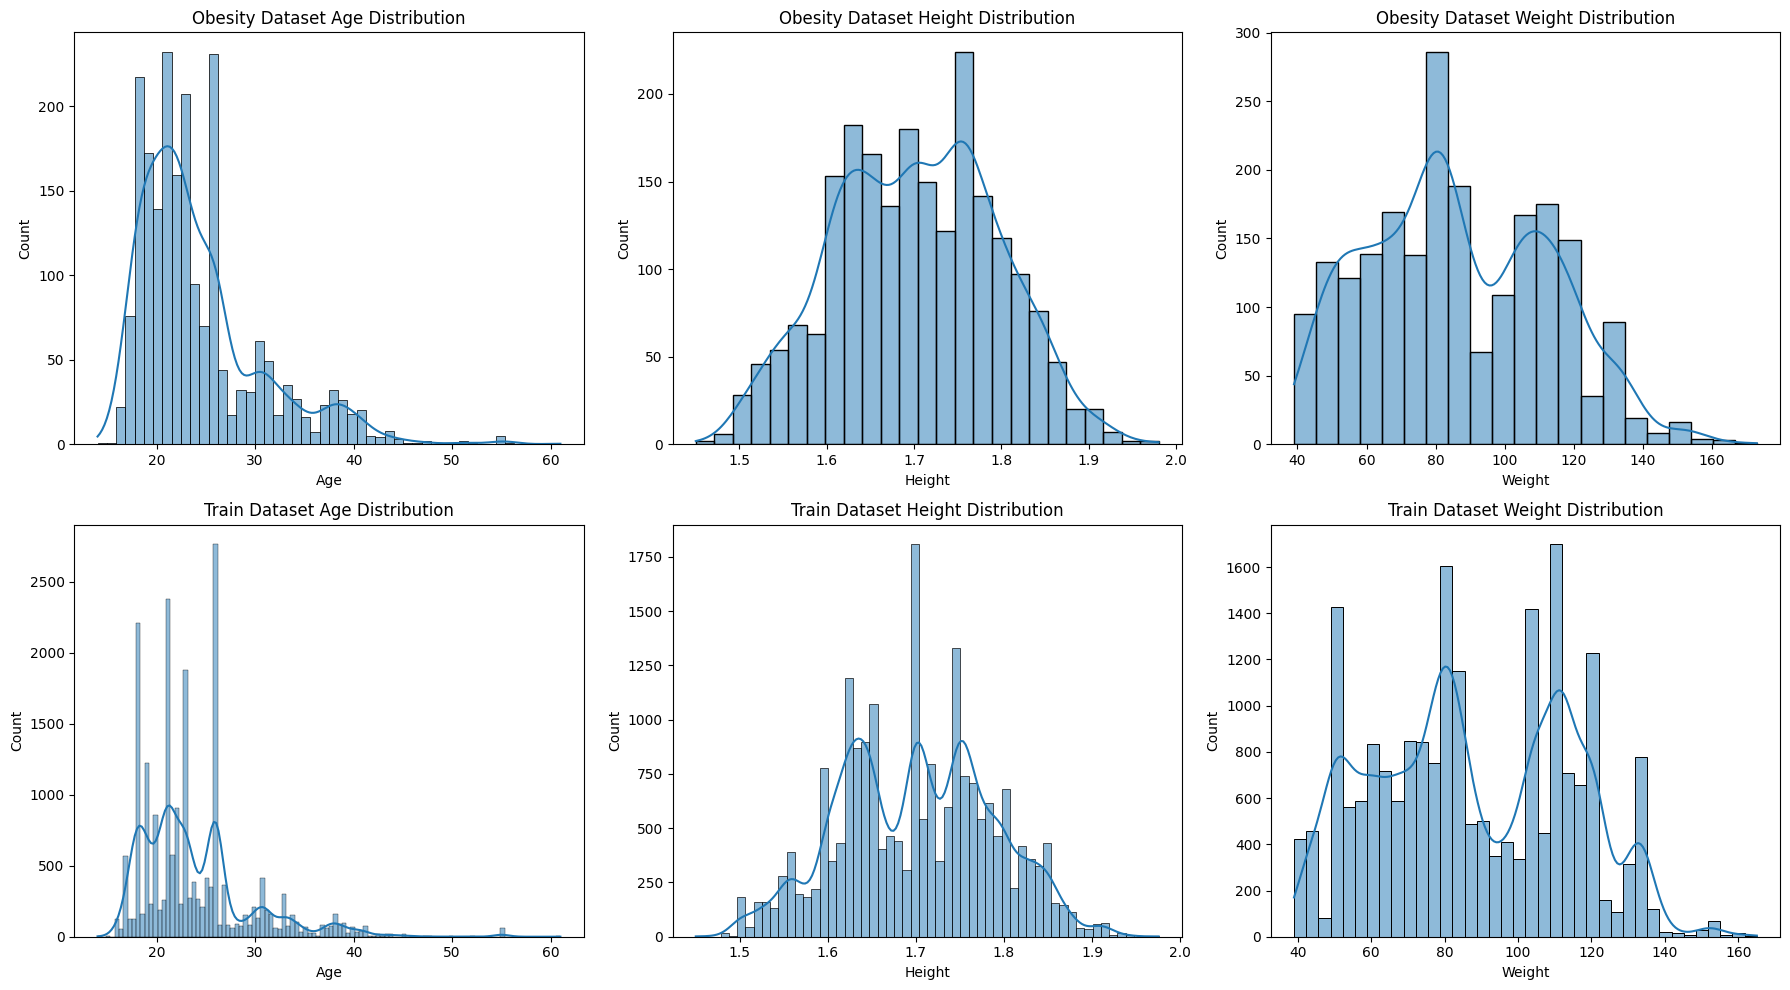

In [ ]:
plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
sns.histplot(obesity_df['Age'], kde=True, palette="coolwarm")
plt.title('Obesity Dataset Age Distribution')

plt.subplot(2, 3, 4)
sns.histplot(train_df['Age'], kde=True, palette="coolwarm")
plt.title('Train Dataset Age Distribution')

plt.subplot(2, 3, 2)
sns.histplot(obesity_df['Height'], kde=True, palette="coolwarm")
plt.title('Obesity Dataset Height Distribution')

plt.subplot(2, 3, 5)
sns.histplot(train_df['Height'], kde=True, palette="coolwarm")
plt.title('Train Dataset Height Distribution')

plt.subplot(2, 3, 3)
sns.histplot(obesity_df['Weight'], kde=True, palette="coolwarm")
plt.title('Obesity Dataset Weight Distribution')

plt.subplot(2, 3, 6)
sns.histplot(train_df['Weight'], kde=True, palette="coolwarm")
plt.title('Train Dataset Weight Distribution')

plt.tight_layout()
plt.show()

The histograms reveal the distribution of Age, Height, and Weight in both datasets. Here are some observations:

1. Age: In the obesity dataset, the age distribution seems skewed towards the right, indicating that most of the participants are younger, with few older participants. In the train dataset, however, the age appears to be uniformly distributed, suggesting that the transformation applied to the original dataset might have somehow altered the age distribution.

2. Height: The height distributions are quite similar for both datasets, with a normal distribution observed around the mean height. Most participants fall between the height of 1.55 and 1.85 meters in the obesity dataset and around 1 in the train dataset (after being normalized).

3. Weight: For the obesity dataset, the weight distribution is somewhat right-skewed, with most of the weights concentrated between around 55 and 110kg. For the train dataset, weights also seem to follow a roughly normal distribution, with most weights centered around the range 90 to 110.

In summary, both datasets are similar in their distributions of height and weight, with the age distribution being the primary difference. The Next step is to explore the relationships between these variables, and how they relate to Obesity levels. I'll make some scatter plots to examine these relationships in

### Results from the seperate datas

The analysis involved an exploratory data study (EDA) of two datasets on obesity risk, namely 'obesity_df' and 'train_df'. 

The 'obesity_df' dataset, which is the original data, comprises 2111 entries with 17 attributes. The data includes demographic, dietary, physical activity, and health metrics related to each participant.

The 'train_df', presumably a transformed version of the original data, consists of 20758 entries with a similar set of 17 attributes.

 both datasets present substantial similarities:

1. Balanced gender representation.
2. Majority of participants with family history of overweight.
3. Predominant consumption of high caloric food.
4. Few smokers.
5. Limited monitoring of calories consumption.
6. Varying levels of obesity represented

## EDA on merged datasets

In [ ]:
merged_df = pd.concat([obesity_df, train_df], ignore_index=True)

merged_df.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  id  
0  Public_Transportation        Normal_Weight NaN  
1  Public_Transportation        Normal_Weight NaN  
2  Public_Transportation        Normal_Weight NaN  
3                Walking   Overweight_Level_I NaN  
4  Public_Transportation  Overweight_Level_II NaN

In [ ]:
merged_descriptive_stats = merged_df.select_dtypes(include=['float64', 'int64']).describe()
print(merged_descriptive_stats)

correlation_matrix = merged_df.select_dtypes(include=['float64', 'int64']).corr()
print(correlation_matrix)

                Age        Height        Weight          FCVC           NCP  \
count  22869.000000  22869.000000  22869.000000  22869.000000  22869.000000   
mean      23.885263      1.700377     87.767610      2.443428      2.754344   
std        5.753419      0.087881     26.364243      0.533329      0.712711   
min       14.000000      1.450000     39.000000      1.000000      1.000000   
25%       20.000000      1.631662     66.000000      2.000000      3.000000   
50%       22.815416      1.700000     84.000000      2.392665      3.000000   
75%       26.000000      1.763029    111.531208      3.000000      3.000000   
max       61.000000      1.980000    173.000000      3.000000      4.000000   

               CH2O           FAF           TUE           id  
count  22869.000000  22869.000000  22869.000000  20758.00000  
mean       2.027442      0.984382      0.620551  10378.50000  
std        0.608901      0.839466      0.602850   5992.46278  
min        1.000000      0.000000   

In [ ]:
numerical_cols = ["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]
corr_matrix = merged_df[numerical_cols].corr()
corr_matrix

Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
Age     1.000000 -0.013136  0.274587  0.032191 -0.048667 -0.019522 -0.187003   
Height -0.013136  1.000000  0.420985 -0.068315  0.196728  0.186544  0.295215   
Weight  0.274587  0.420985  1.000000  0.243127  0.097436  0.307181 -0.081868   
FCVC    0.032191 -0.068315  0.243127  1.000000  0.106511  0.098377 -0.079678   
NCP    -0.048667  0.196728  0.097436  0.106511  1.000000  0.078770  0.103406   
CH2O   -0.019522  0.186544  0.307181  0.098377  0.078770  1.000000  0.090757   
FAF    -0.187003  0.295215 -0.081868 -0.079678  0.103406  0.090757  1.000000   
TUE    -0.295494  0.074073 -0.085346 -0.143728  0.063616 -0.008730  0.024929   

             TUE  
Age    -0.295494  
Height  0.074073  
Weight -0.085346  
FCVC   -0.143728  
NCP     0.063616  
CH2O   -0.008730  
FAF     0.024929  
TUE     1.000000

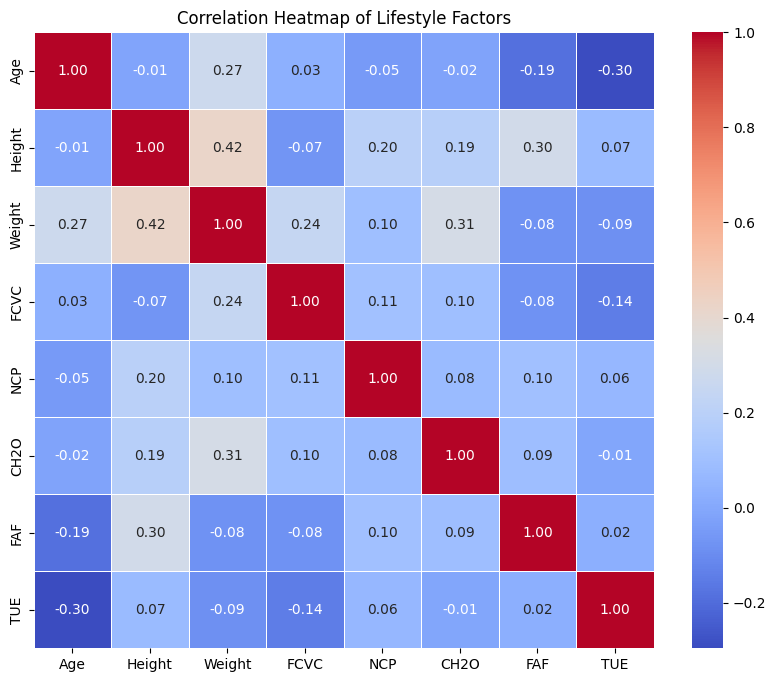

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Lifestyle Factors")
plt.show()

A heatmap allows us to see the correlation between different variables at a glance. This particular image gives us a visual representation of the correlation matrix we calculated earlier for our numerical columns. Red cells indicate positive correlation, while blue cells imply a negative relationship. The color intensity and the value in the cell both symbolize how strong the correlation is.

Looking at the heatmap, the moderate positive correlation between height and weight stands out (correlation of 0.42) as well as the mild positive correlation between age and weight (correlation of 0.27). Other variables show weak to insignificant degrees of correlation with each other, indicated by color tones that are close to white and correlation values closer to zero.


The correlation matrix shows the relationship between the lifestyle habits (FCVC, NCP, CH2O, FAF, TUE) and obesity levels (NObeyesdad) in the merged dataset:

- FCVC (Frequent Consumption of Vegetables) has a positive correlation with obesity levels. This means that as the consumption of vegetables increases, the obesity levels also tend to increase.
- NCP (Number of Main Meals) shows almost no correlation with obesity levels. This suggests that the number of meals a person eats isn't significantly related to their obesity levels.
- CH2O (Consumption of Water Daily) has a positive correlation with obesity levels. This suggests that individuals who consume more water tend to have higher obesity levels.
- FAF (Physical Activity Frequency) has a negative correlation with obesity levels. This means that as the frequency of physical activity increases, the obesity levels generally decrease.
- TUE (Time Using Technology Devices) has a negative correlation with obesity levels. This suggests that spending more time on technology devices is associated with lower obesity levels.

These findings suggest that lifestyle habits related to diet and physical activity have an important relationship with obesity levels. It should be noted that the strength of these correlations is rather weak and correlation does not imply causation. 


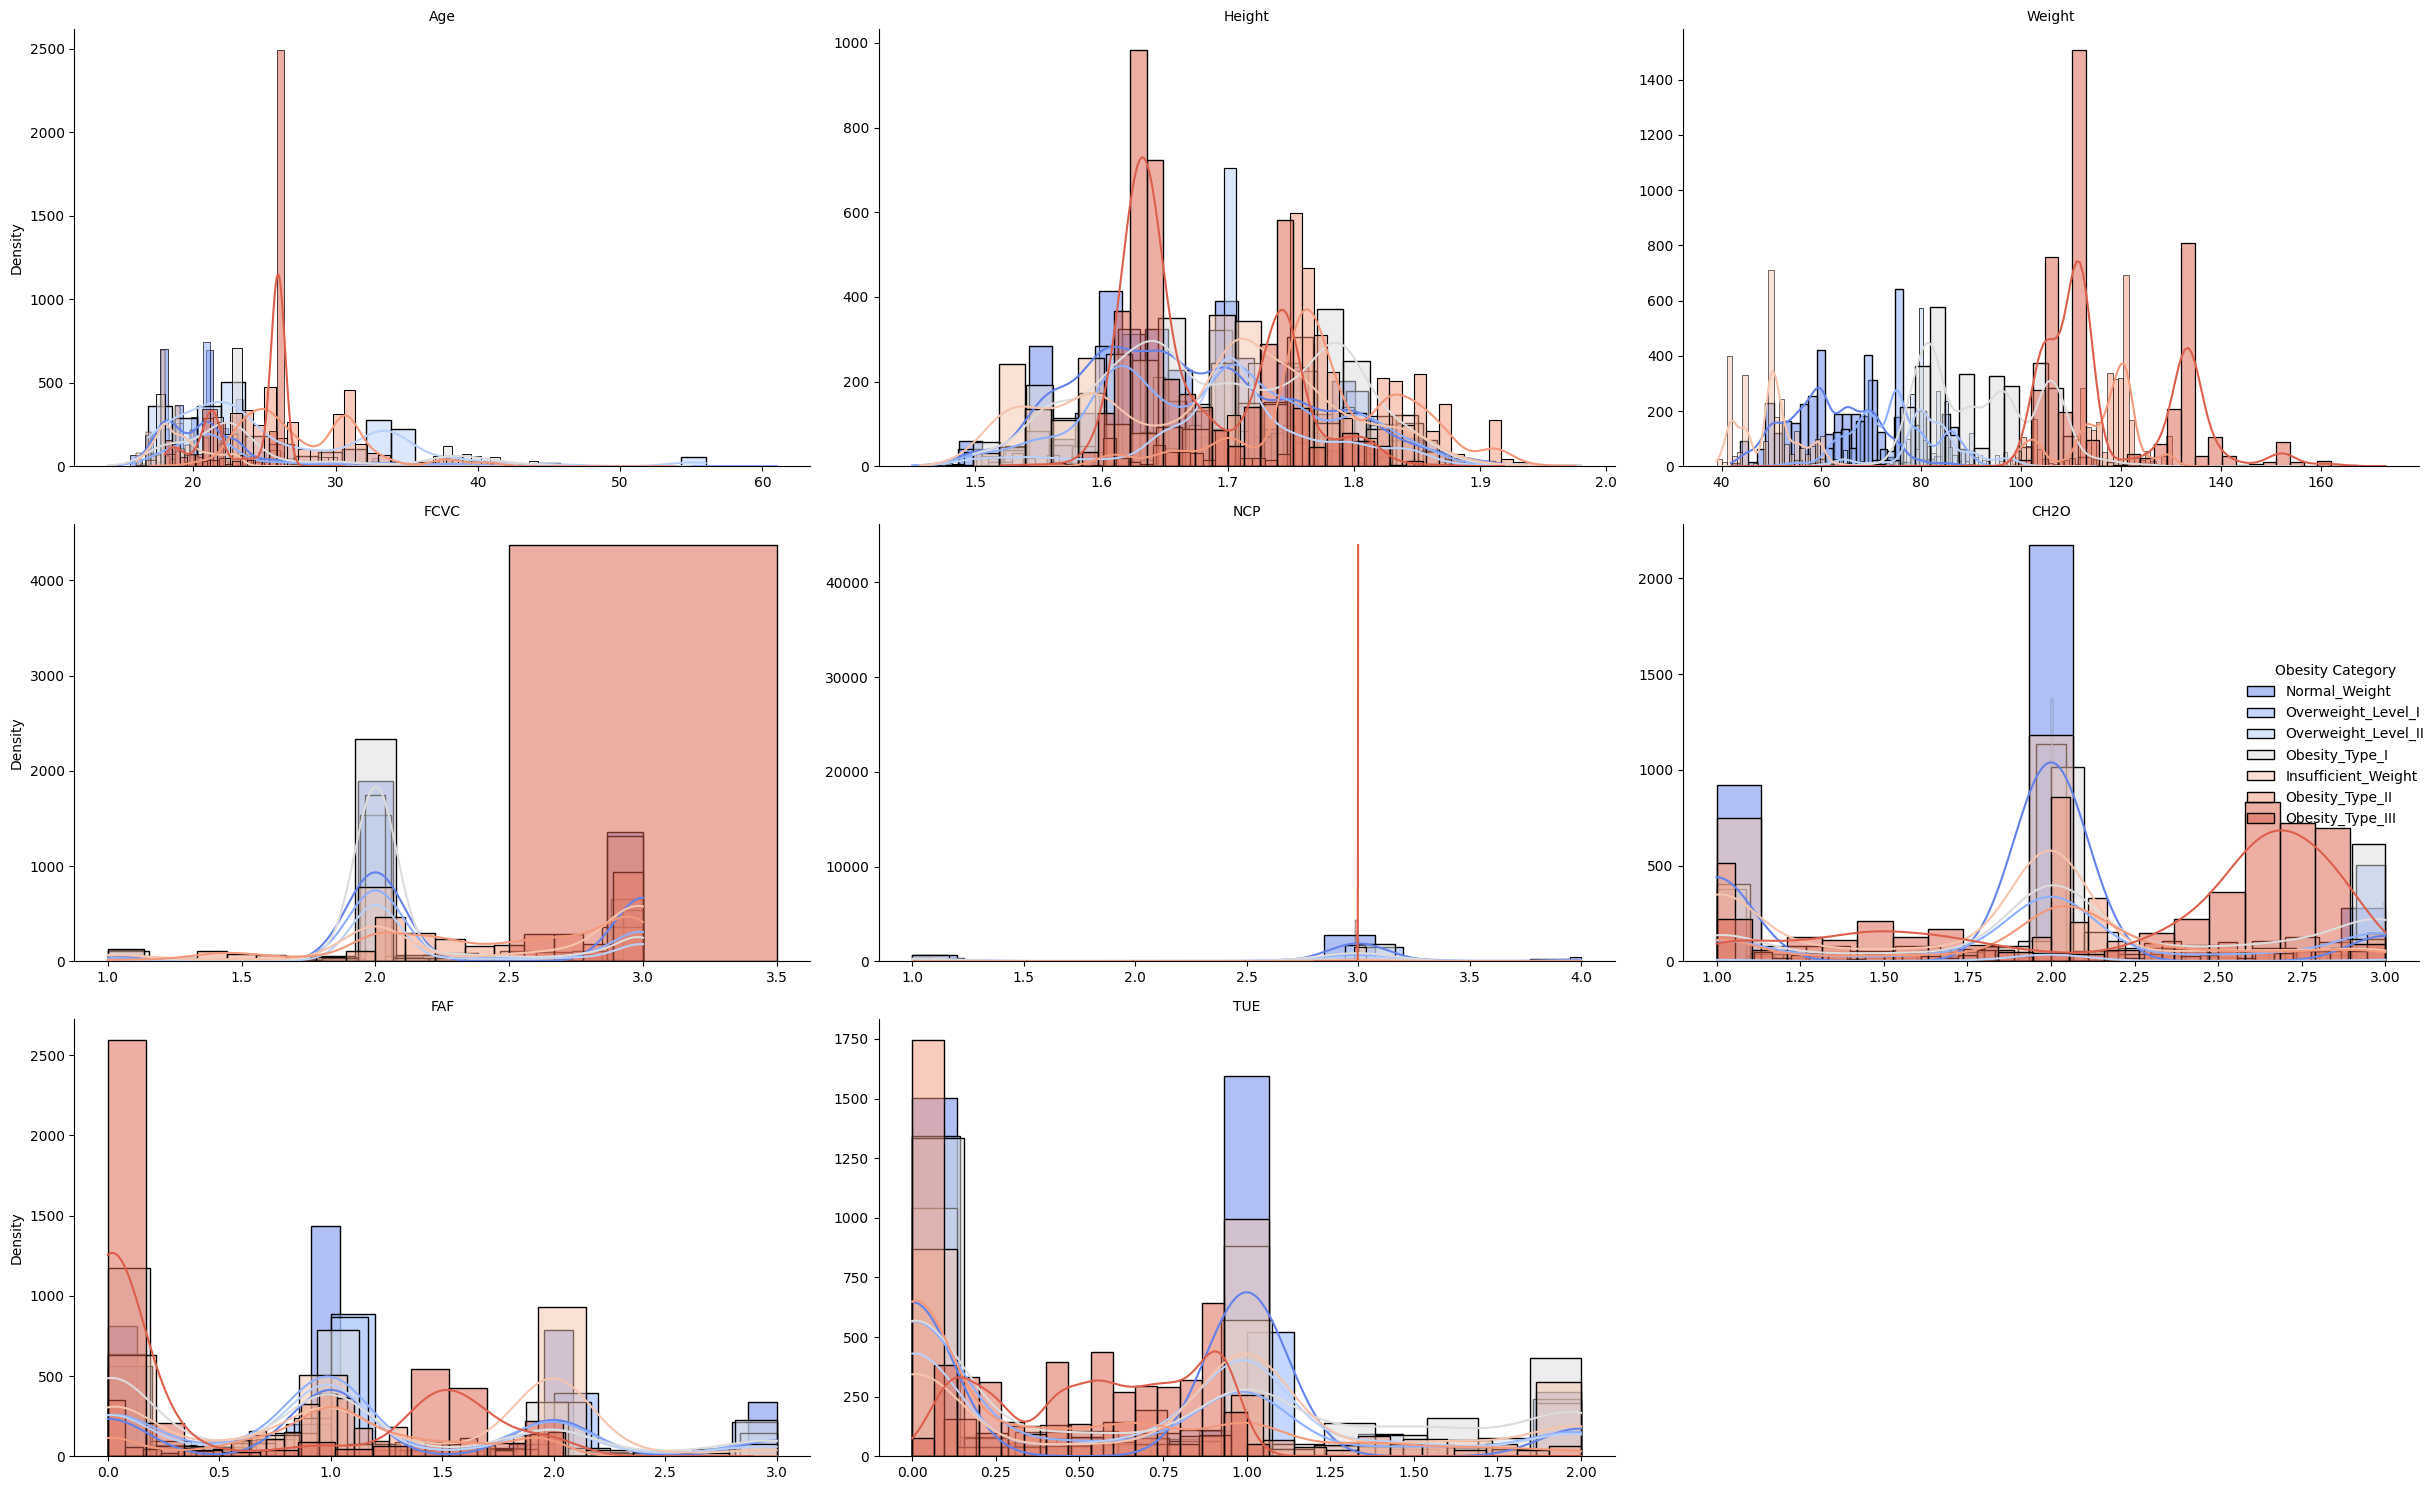

In [ ]:
df_long = merged_df.melt(
    id_vars="NObeyesdad", value_vars=numerical_cols, var_name="Feature", value_name="Value"
)

g = sns.FacetGrid(
    df_long,
    col="Feature",
    col_wrap=3,
    sharex=False,
    sharey=False,
    hue="NObeyesdad",
    height=5,
    aspect=1.5,
    palette="coolwarm",
)
g.map(sns.histplot, "Value", kde=True, stat="count", common_norm=False)

g.add_legend(title="Obesity Category")

g.set_titles("{col_name}")
g.set_axis_labels("", "Density")

plt.tight_layout()
plt.show()

The FacetGrid plot provides individual histograms for each of the numerical features, further segmented by obesity category. Here are a few notable observations from the plots:

1. Age: There's a wide distribution across all obesity categories, but some patterns can be observed. For instance, the 'Insufficient_Weight' category tends to include younger individuals, while 'Obesity_Type_III' tends more towards older individuals.
2. Height: Most categories show a roughly normal distribution centered around a specific height. Individuals with Insufficient Weight are typically shorter, while those with Obesity Type II and III tend to be taller.
3. Weight: As expected, weight distributions separate obesity groups quite noticeably. Lower weight individuals fall under 'Insufficient_Weight', while higher weight individuals are in 'Obesity_Type_III'.
4. FCVC (Frequency of consumption of high caloric food), NCP (Number of main meals), CH2O (Consumption of water daily), FAF (Physical activity frequency), and TUE (Time spent on technological devices): The distribution of these variables is relatively more uniform across the different obesity categories.

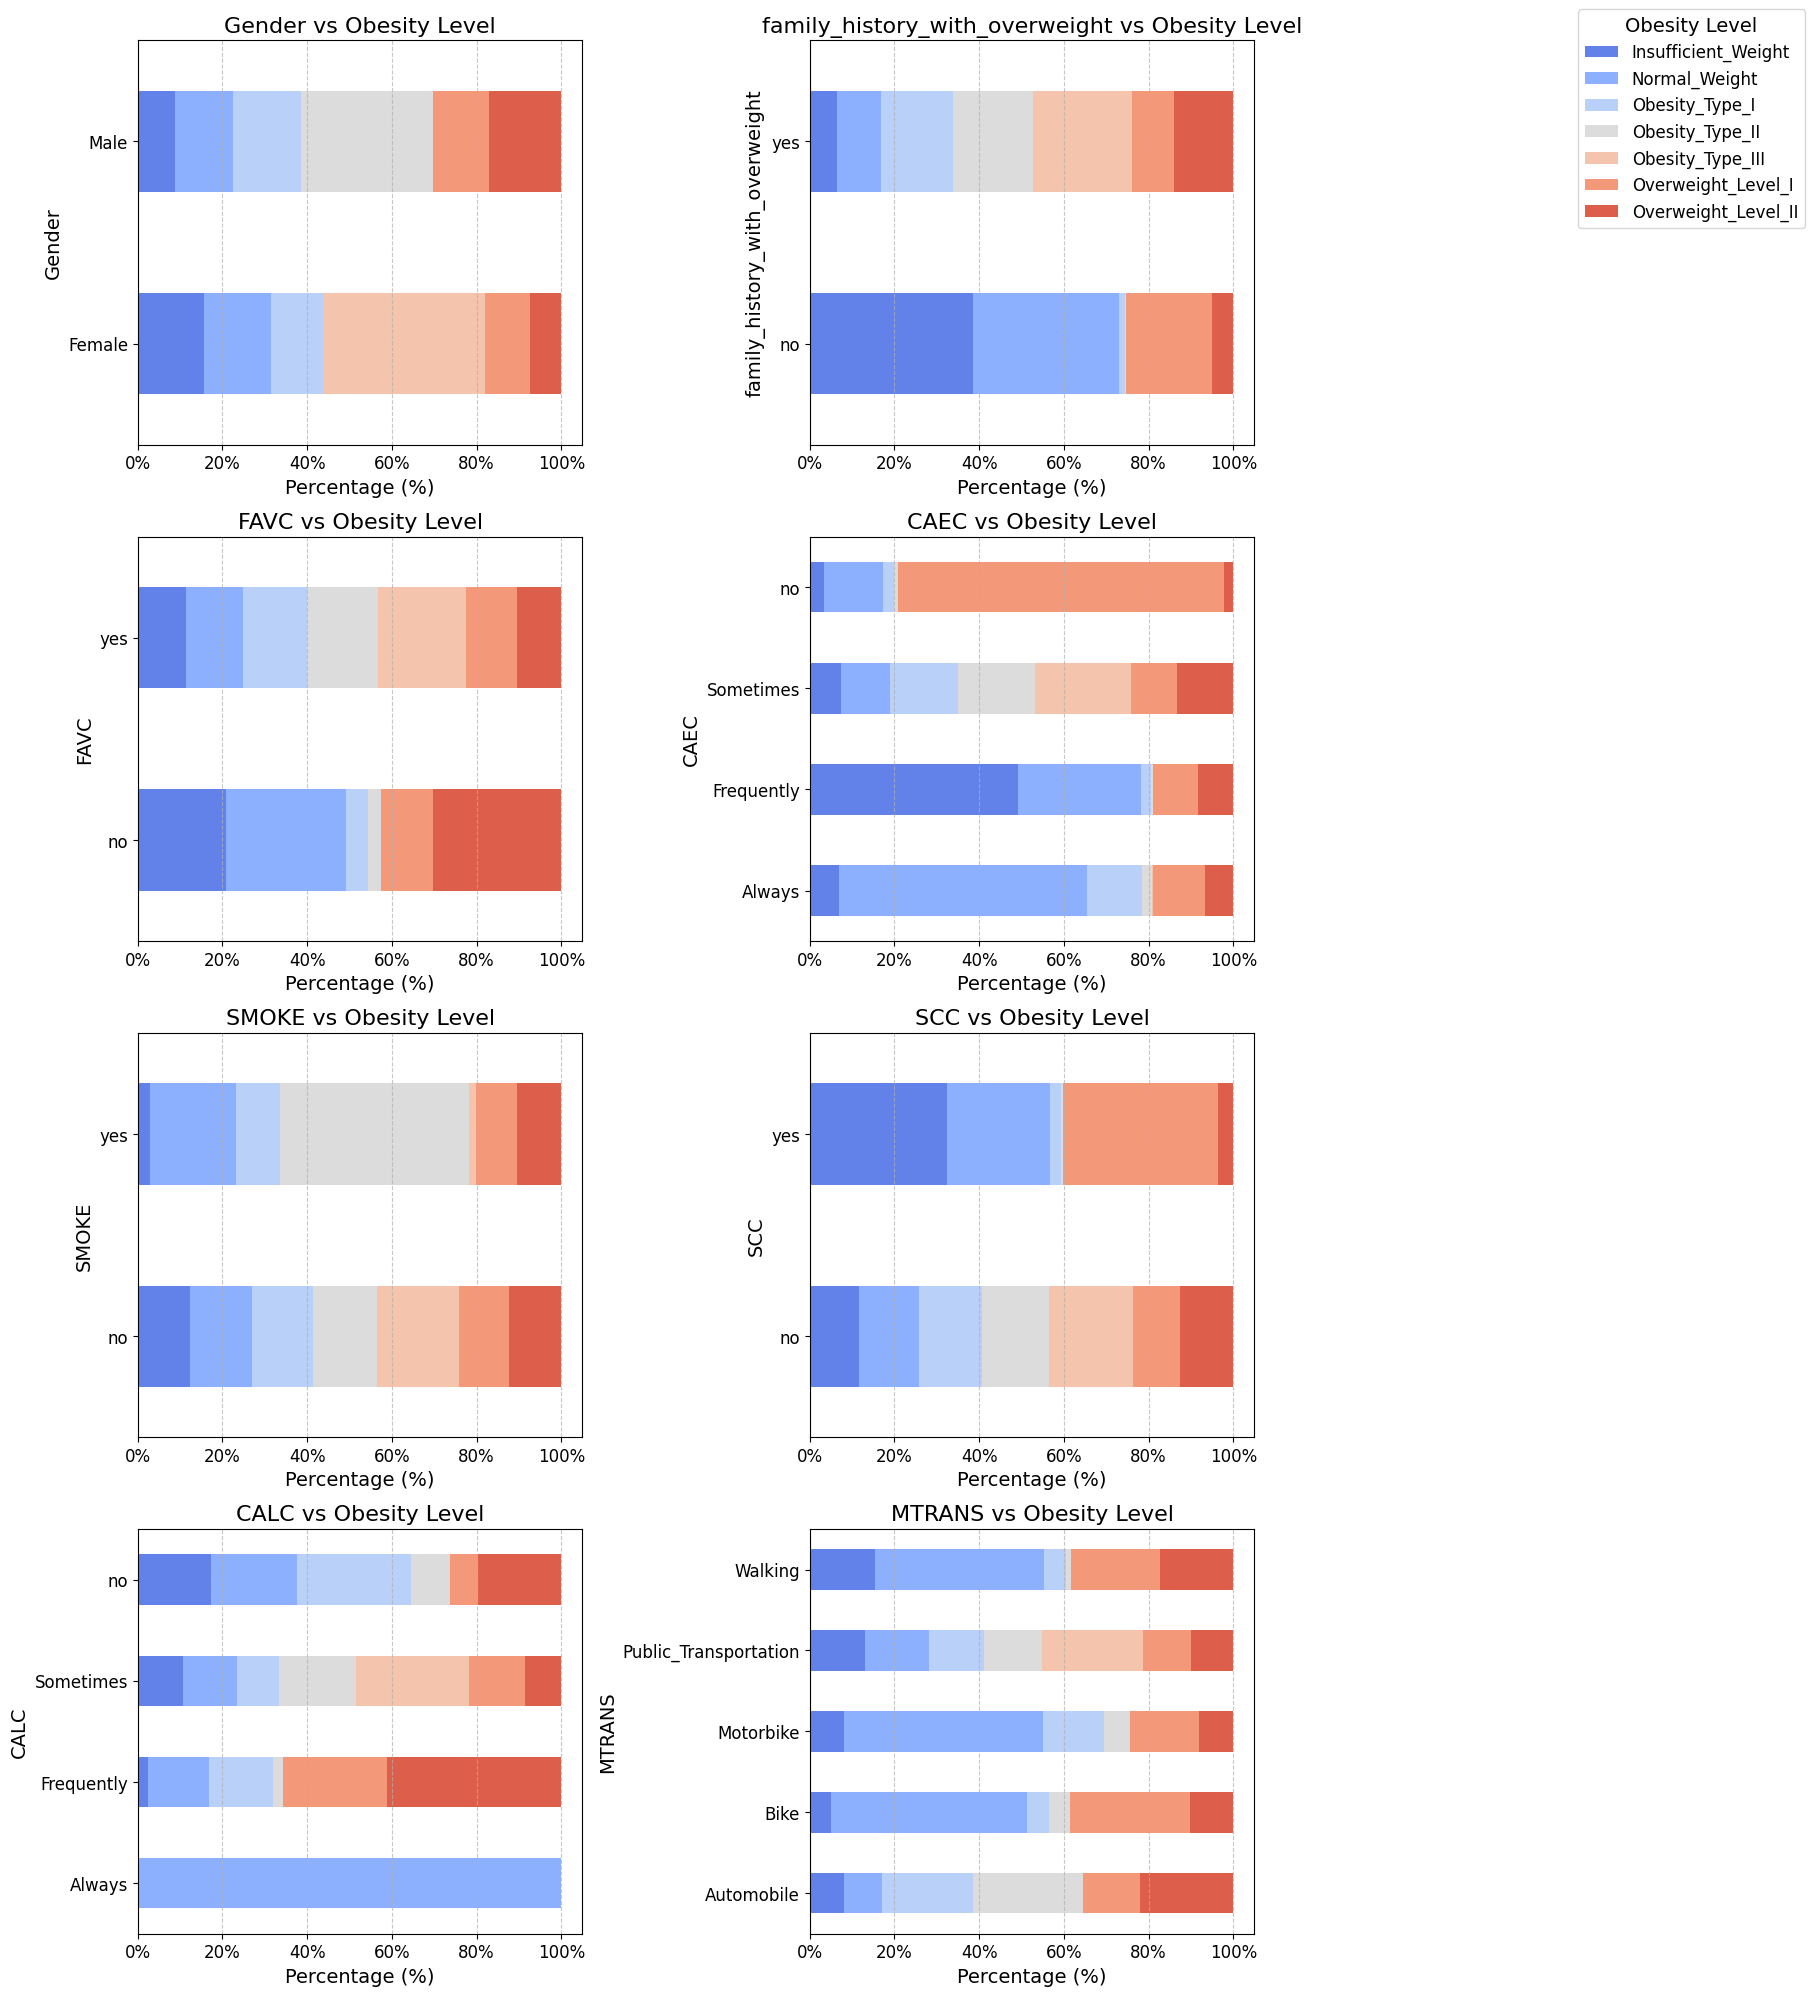

In [ ]:
def plot_categorical_dist(merged_df, categorical_cols):
    """
    Plots the distribution of categorical variables against obesity categories.

    Parameters:
    merged_df (DataFrame): Merged dataframe containing both datasets.
    categorical_cols (list): List of categorical columns to be analyzed.
    """
    palette = sns.color_palette(
        "coolwarm", n_colors=len(merged_df["NObeyesdad"].unique())
    )

    nrows = len(categorical_cols) // 2 + len(categorical_cols) % 2
    fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(15, 20))
    plt.subplots_adjust(hspace=0.5, wspace=0.4)

    axes = axes.flatten()

    for i, column in enumerate(categorical_cols):
        ax = axes[i]
        data = (
            merged_df.groupby([column, "NObeyesdad"])
            .size()
            .unstack()
            .apply(lambda x: x / x.sum() * 100, axis=1)
        )
        data.plot(kind="barh", stacked=True, ax=ax, color=palette, legend=False)

        ax.set_title(f"{column} vs Obesity Level", fontsize=16)
        ax.set_xlabel("Percentage (%)", fontsize=14)
        ax.set_ylabel(column, fontsize=14)
        ax.tick_params(axis="both", which="major", labelsize=12)

        ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0f}%"))
        ax.grid(axis="x", linestyle="--", alpha=0.7)

    handles, labels = ax.get_legend_handles_labels()
    fig.legend(
        handles,
        labels,
        title="Obesity Level",
        fontsize=12,
        title_fontsize=14,
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
    )

    fig.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()


categorical_cols = [
    "Gender",
    "family_history_with_overweight",
    "FAVC",
    "CAEC",
    "SMOKE",
    "SCC",
    "CALC",
    "MTRANS",
]

plot_categorical_dist(merged_df, categorical_cols)


The FacetGrid plots illustrate the distribution of various numerical features (Age, Height, Weight, Frequency of consumption of high caloric food (FCVC), Number of main meals (NCP), Consumption of water daily (CH2O), Physical activity frequency (FAF), and Time using technology devices (TUE)) across different obesity categories. Here are a few key observations:

1. **Weight**: As expected, weight has a clear correlation with obesity levels. Higher weight distributions are more prevalent in higher obesity categories.
2. **Height**: There's no apparent correlation between height and obesity categories.
3. **Age**: Older age seems to have a slight inclination towards higher obesity levels, particularly noticeable in the Obesity Type III category.
4. **Physical activity frequency (FAF)**: Lower physical activity levels seem to correlate with higher obesity levels, evidenced by higher concentrations in lower FAF values for Obesity Type II and III categories.
5. **Time using technology devices (TUE)**: There's a slight indication that higher TUE values (implying more sedentary behavior) might correlate with higher obesity levels, though the relationship appears less direct compared to weight and physical activity.

This graphical representation provides a detailed look at how different lifestyle factors and demographic variables are associated with obesity levels. It highlights the multi-dimensional nature of obesity and the various factors that might contribute to it.


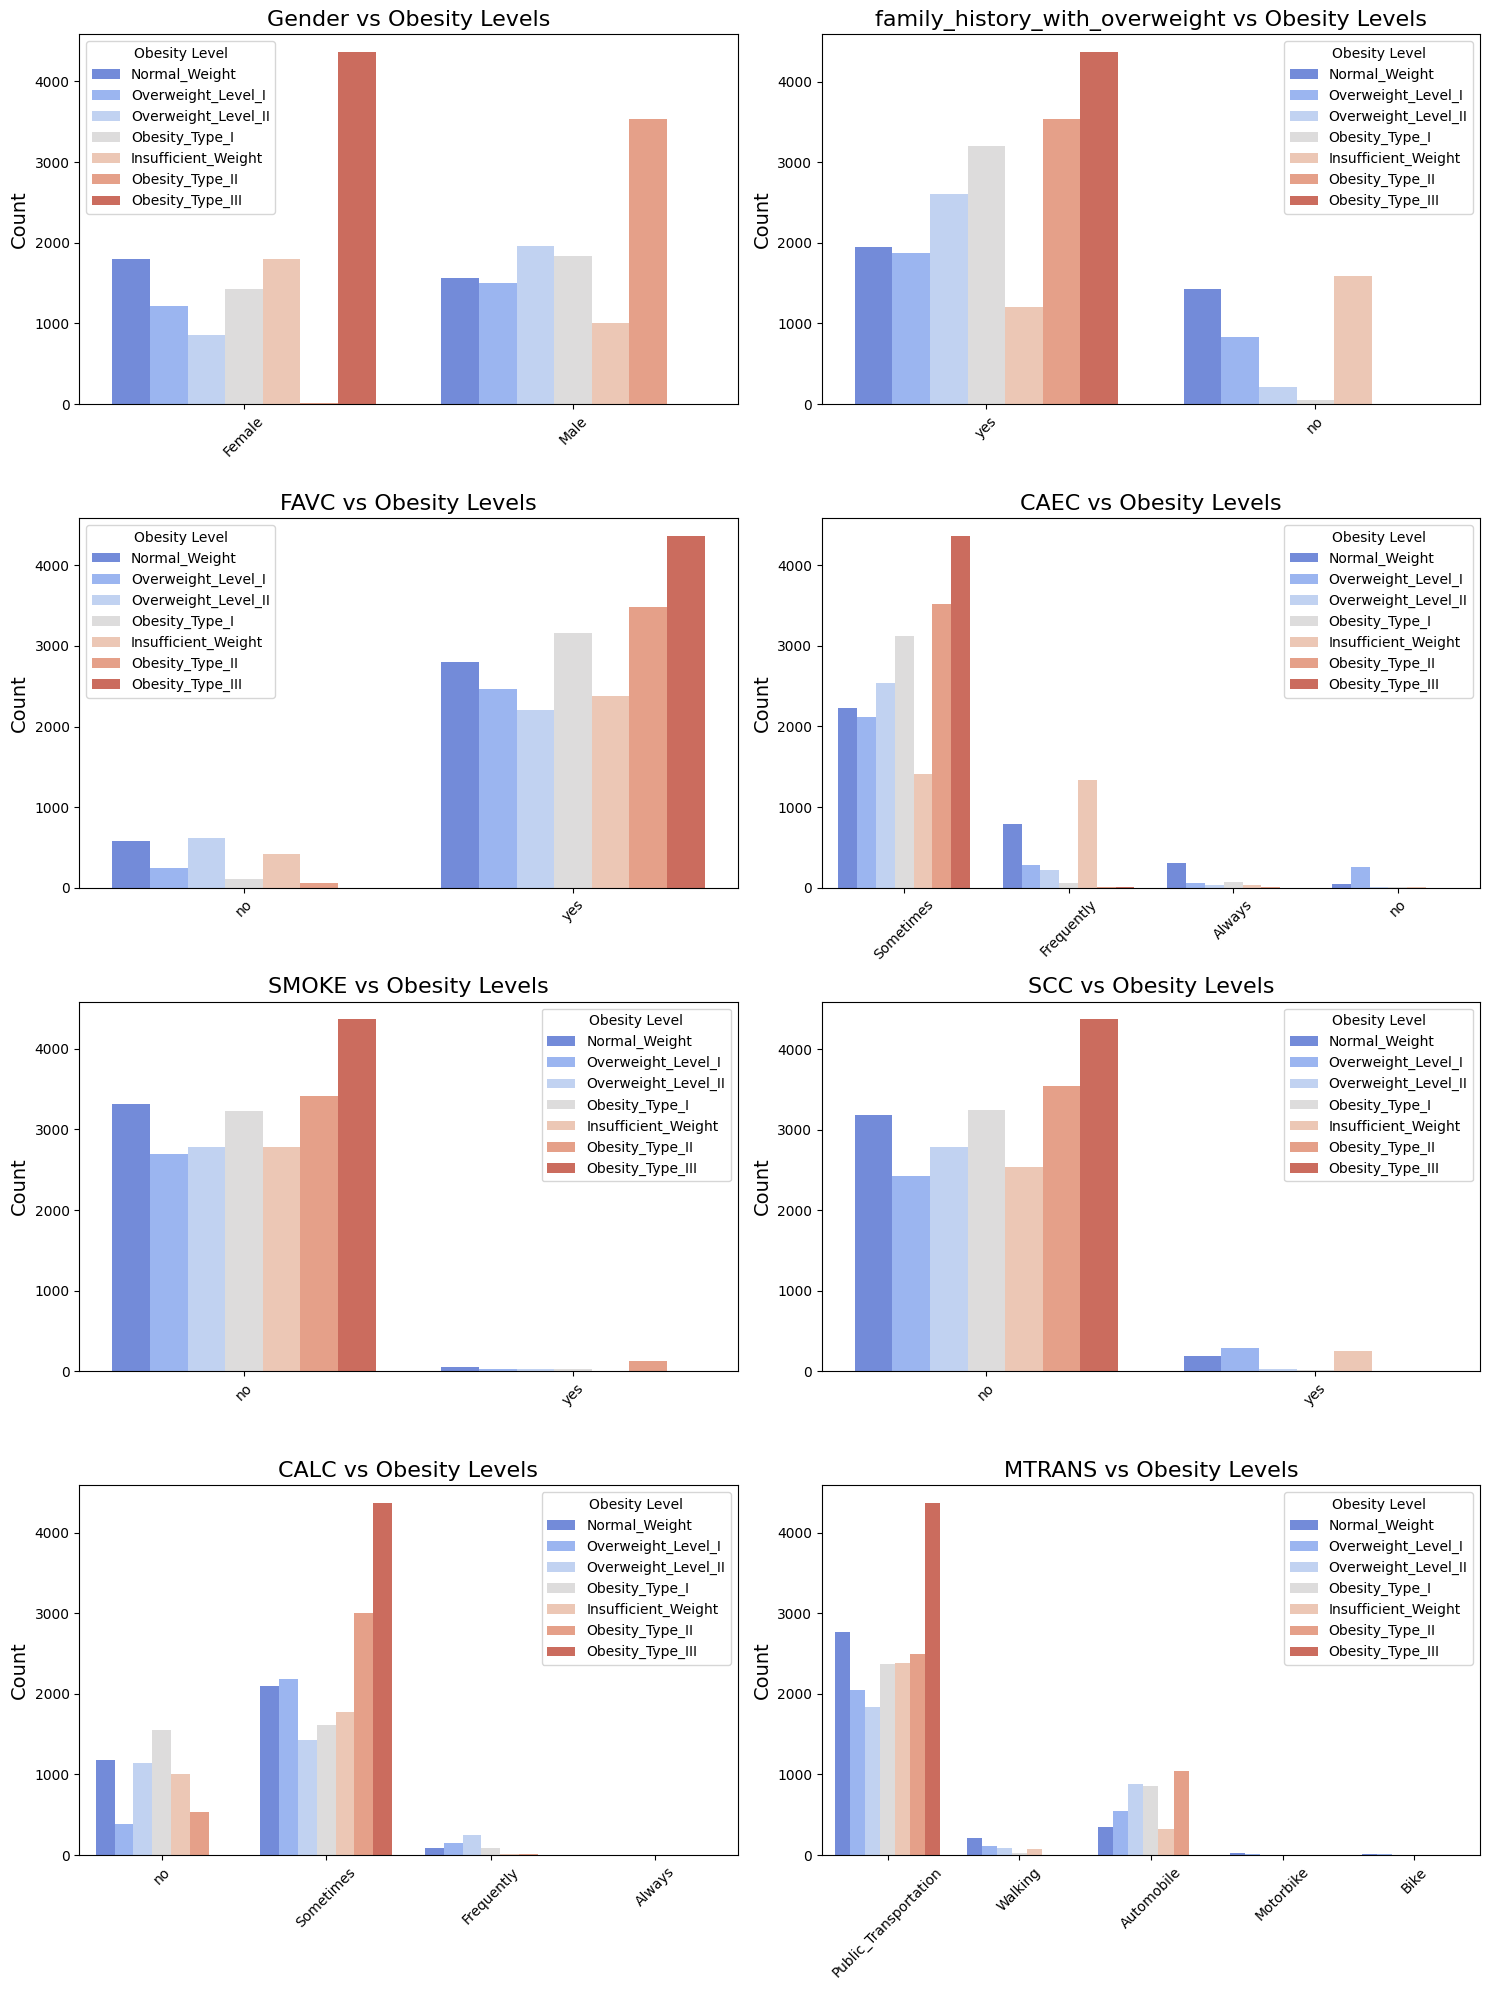

In [ ]:
categorical_cols = [
    "Gender",
    "family_history_with_overweight",
    "FAVC",
    "CAEC",
    "SMOKE",
    "SCC",
    "CALC",
    "MTRANS",
]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
plt.subplots_adjust(hspace=0.5, wspace=0.4)

for i, column in enumerate(categorical_cols):
    ax = axes.flatten()[i]
    sns.countplot(x=column, hue="NObeyesdad", data=merged_df, palette="coolwarm", ax=ax)
    ax.set_title(f"{column} vs Obesity Levels", fontsize=16)
    ax.set_xlabel("")
    ax.set_ylabel("Count", fontsize=14)
    ax.tick_params(axis="x", rotation=45)
    ax.legend(title="Obesity Level", fontsize=10)

plt.tight_layout()
plt.show()


The bar plots provide insights into the distribution of obesity levels across different categorical variables:

1. **Gender**: Both genders show a distribution across all obesity levels, with no immediate, visually discernable pattern favoring one gender over another in terms of obesity prevalence.
  
2. **Family History with Overweight**: A strong association is observed, indicating a higher prevalence of obesity levels among those with a family history of overweight compared to those without.

3. **Frequent Consumption of High Caloric Food (FAVC)**: Individuals who frequently consume high caloric food tend to have higher obesity levels. 

4. **Consumption of Food Between Meals (CAEC)**: Different levels of consumption behavior are represented, providing a nuanced view that suggests those engaging in such consumption "Always" or "Frequently" may be at a higher risk for higher obesity levels.

5. **Smoking (SMOKE)**: Smoking status appears to have a less noticeable effect on obesity levels, with distributions somewhat consistent across categories.

6. **Calories Consumption Monitoring (SCC)**: There is a distribution across obesity levels with a less stark contrast, although there is an indication that those not monitoring might slightly lean towards higher obesity levels.

7. **Consumption of Alcohol (CALC)**: Different alcohol consumption levels show varied distributions of obesity levels, suggesting consumption habits might correlate with obesity.

8. **Transportation Used (MTRANS)**: The type of transportation used shows different distributions across obesity levels, pointing towards lifestyle choices as a potential factor.

These various distributions underscore the complex interplay between lifestyle habits, personal habits, and demographic factors in their association with various obesity levels. Notably, the presence of a family history with overweight and frequent consumption of high-caloric food manifest as significant factors associated with higher obesity levels.

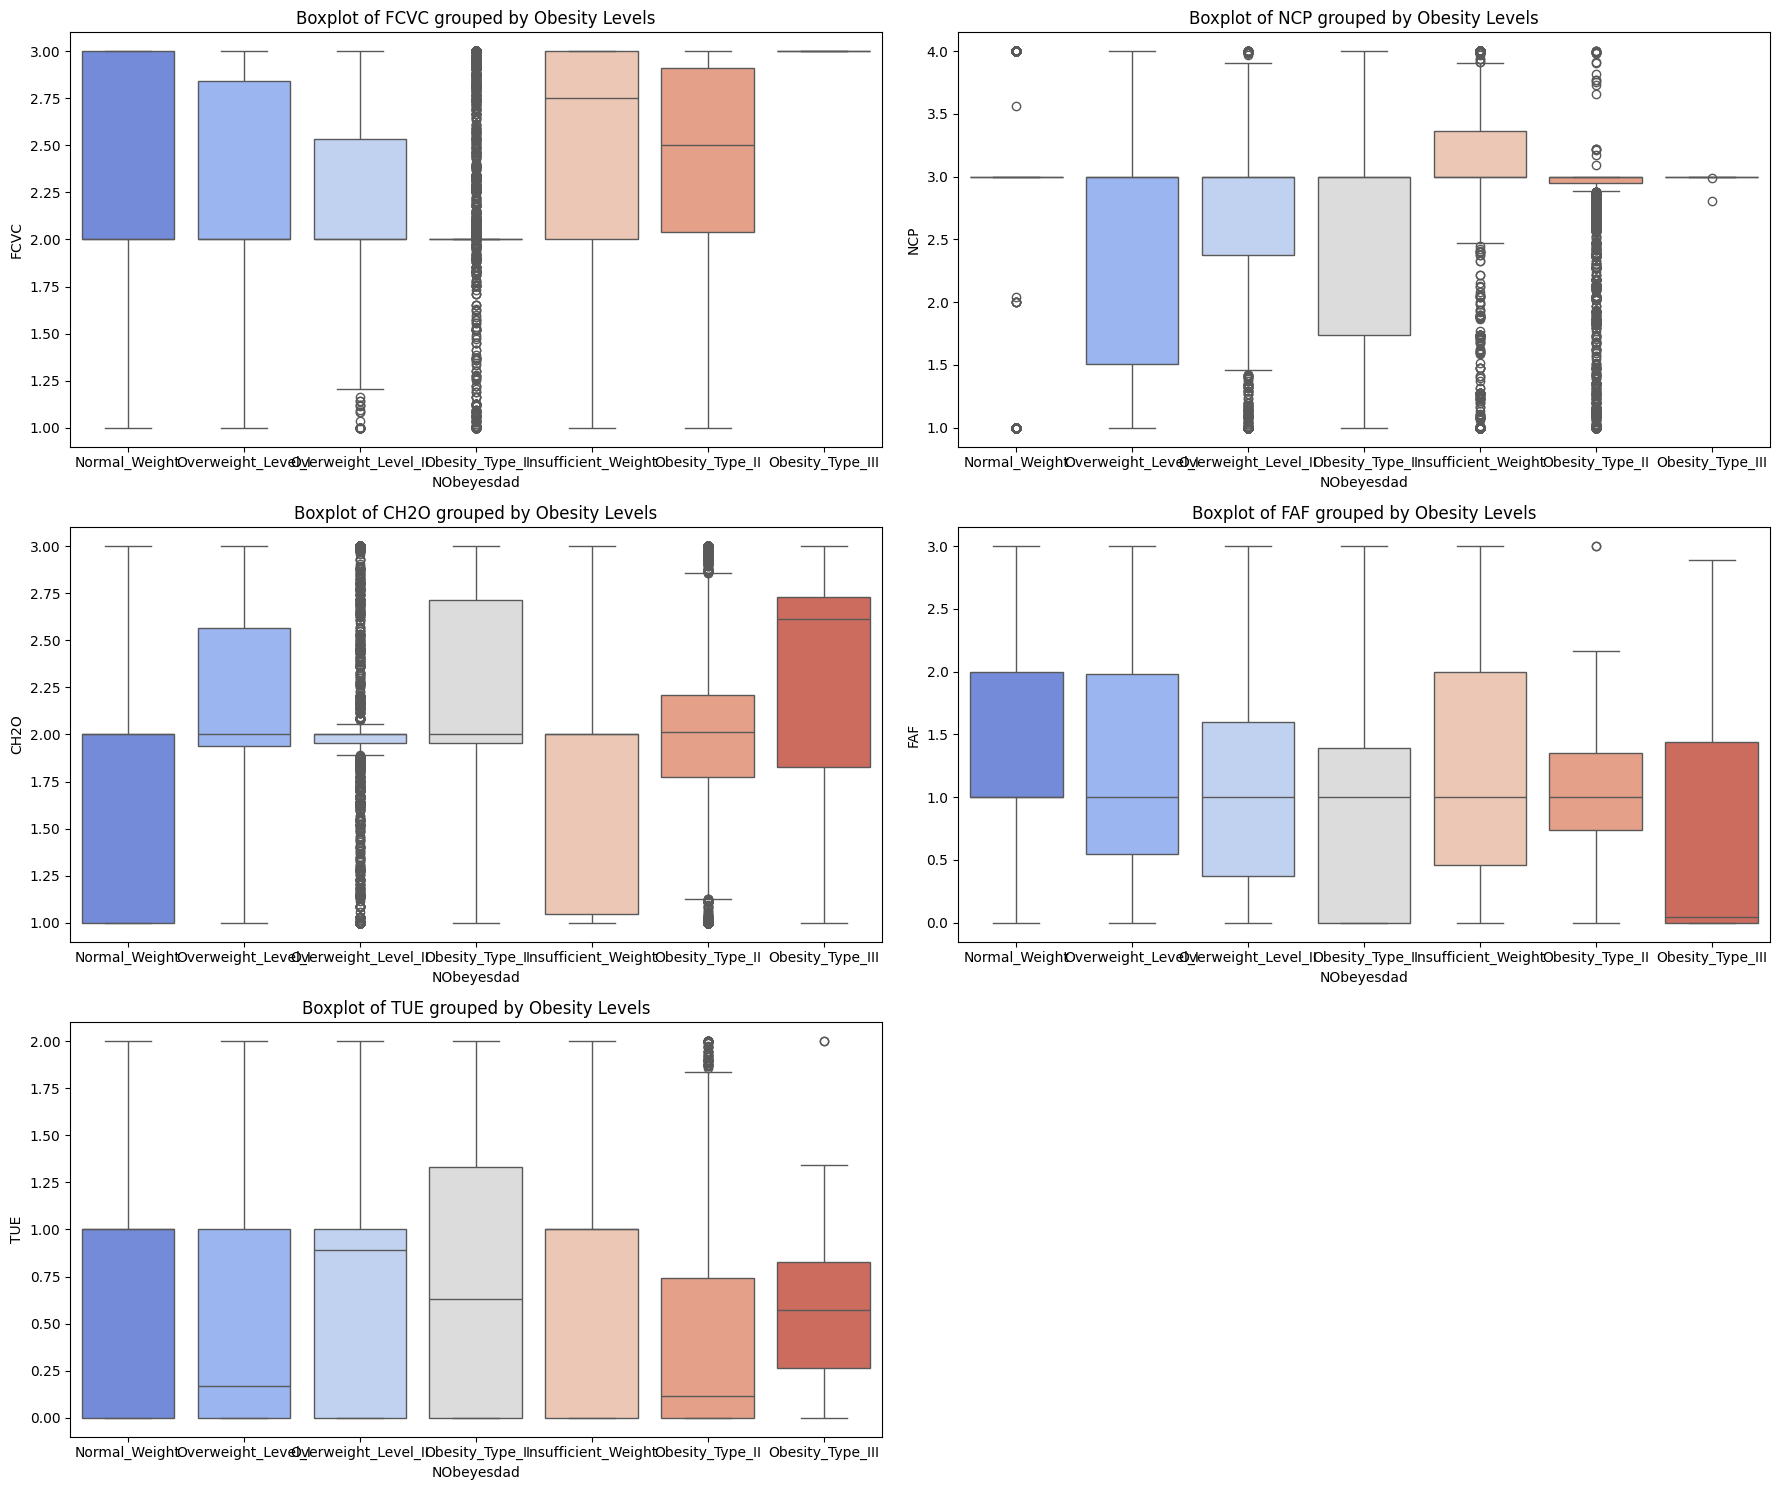

In [ ]:
def plot_lifestyle_habits_boxplot(dataframe):
    plt.figure(figsize=(18, 15))

    lifestyle_habits = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
    for index, habit in enumerate(lifestyle_habits, start=1):
        plt.subplot(3, 2, index)
        sns.boxplot(x='NObeyesdad', y=habit, data=dataframe, palette='coolwarm')
        plt.title(f'Boxplot of {habit} grouped by Obesity Levels')
    
    plt.tight_layout()
    plt.show()

plot_lifestyle_habits_boxplot(merged_df)

The boxplots showcase the distribution of lifestyle habits across different obesity levels:

- FCVC: The median frequency of vegetable consumption tends to gradually increase with the level of obesity. Interestingly, the variance also increases as we move from 'Insufficient_Weight' to 'Obesity_Type_III'. 

- NCP: It appears there's no significant change in the number of main meals across different obesity levels. However, obese people tend to have more outliers who consume fewer meals.

- CH2O: The consumption of water daily seems to have a slightly positive relationship with obesity levels. Similar to FCVC, the variance in water consumption increases significantly in the higher obesity levels.

- FAF: The frequency of physical activity seems to decrease with increasing obesity levels. However, there's a large number of outliers, especially among overweight and underweight individuals.

- TUE: Time spent using technology devices does not exhibit a clear relationship with the obesity levels. For most obesity levels, the data is quite skewed, with several outliers who spend significant amounts of time on technology devices.

These hierarchical boxplots provide us with a more detailed look into the variation and distribution of lifestyle habits among different obesity levels. It's worth noting that these insights should be interpreted cautiously and further investigated due to the presence of many outliers.

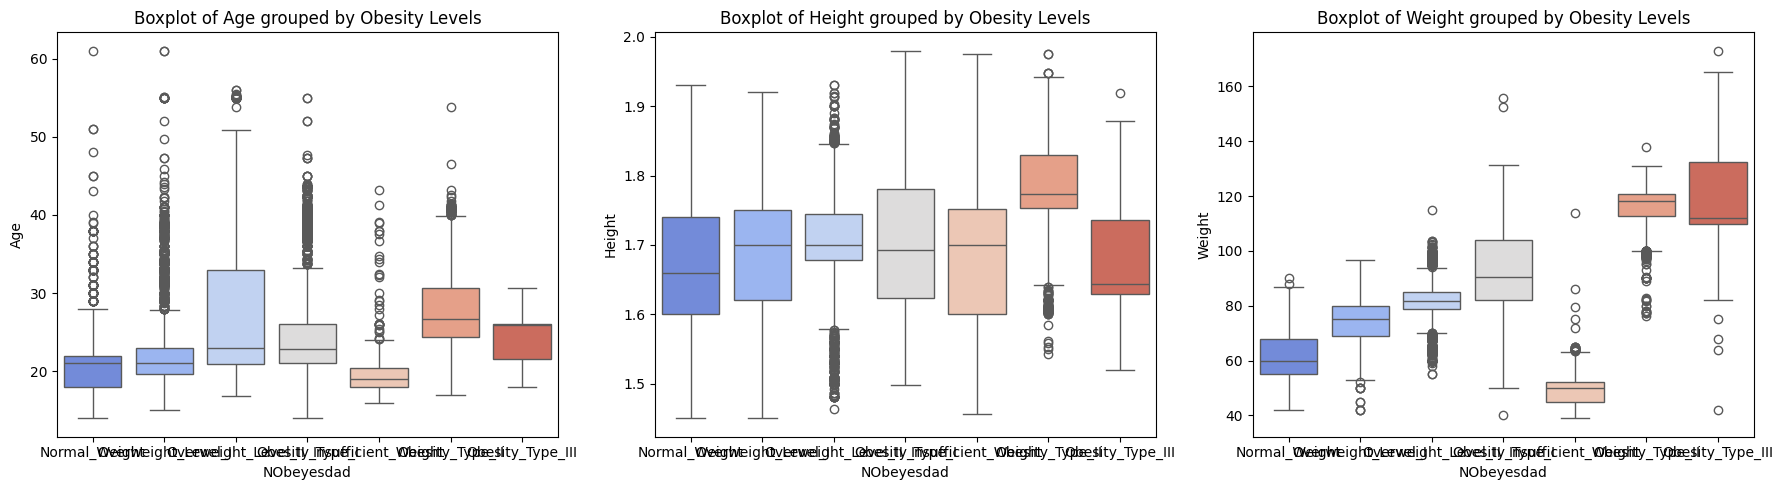

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

sns.boxplot(x="NObeyesdad", y="Age", data=merged_df, ax=axs[0], palette="coolwarm")
axs[0].set_title("Boxplot of Age grouped by Obesity Levels")

sns.boxplot(x="NObeyesdad", y="Height", data=merged_df, ax=axs[1], palette="coolwarm")
axs[1].set_title("Boxplot of Height grouped by Obesity Levels")

sns.boxplot(x="NObeyesdad", y="Weight", data=merged_df, ax=axs[2], palette="coolwarm")
axs[2].set_title("Boxplot of Weight grouped by Obesity Levels")

plt.tight_layout()
plt.show()

The boxplots showcase the variation in Age, Height, and Weight across different obesity levels:

- Age: Individuals falling under 'Underweight', 'Normal Weight', and 'Overweight_Level_I' categories tend to be younger in age, while those identified as 'Obesity_Type_I', 'Obesity_Type_II', and 'Obesity_Type_III' are generally older. The 'Overweight_Level_II' category shows a fairly wide age distribution.

- Height: The median height seems to decrease progressively as we move from 'Underweight' to 'Overweight_Level_I' categories. Beyond this, the fluctuation is less predictable among the three obesity categories. 

- Weight: There is a clear and strong positive relationship between weight and obesity levels. As obesity level increases, the weight also generally increases. The spread in the boxplots also increases, indicating a larger variance in weight for higher obesity levels. In the highest category of obesity ('Obesity_Type_III'), some outliers have exceptionally high weights.

In summary, these plots provide a detailed view of how age, height, and weight interact with different obesity levels. 

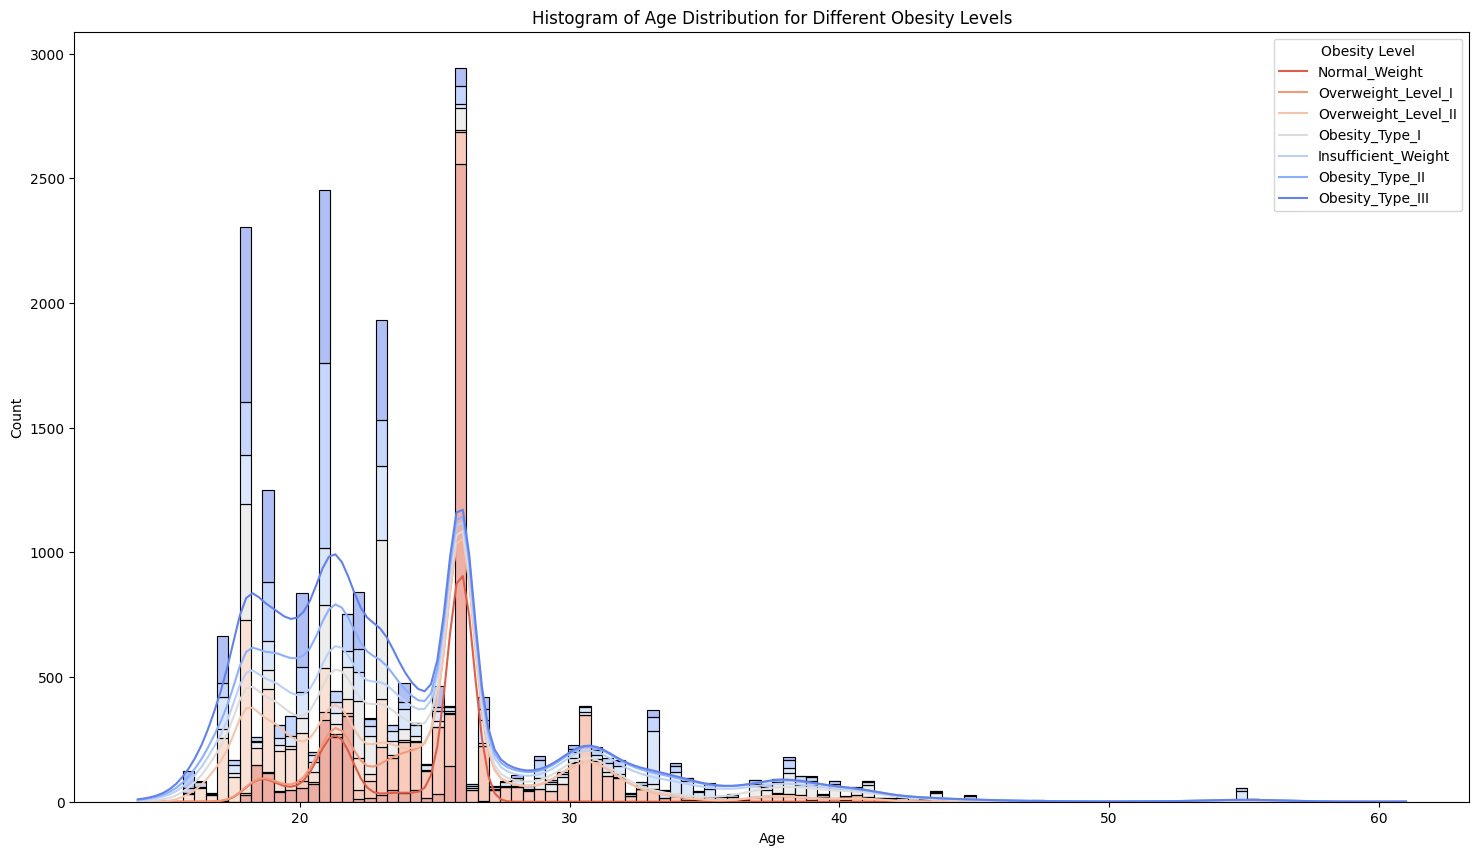

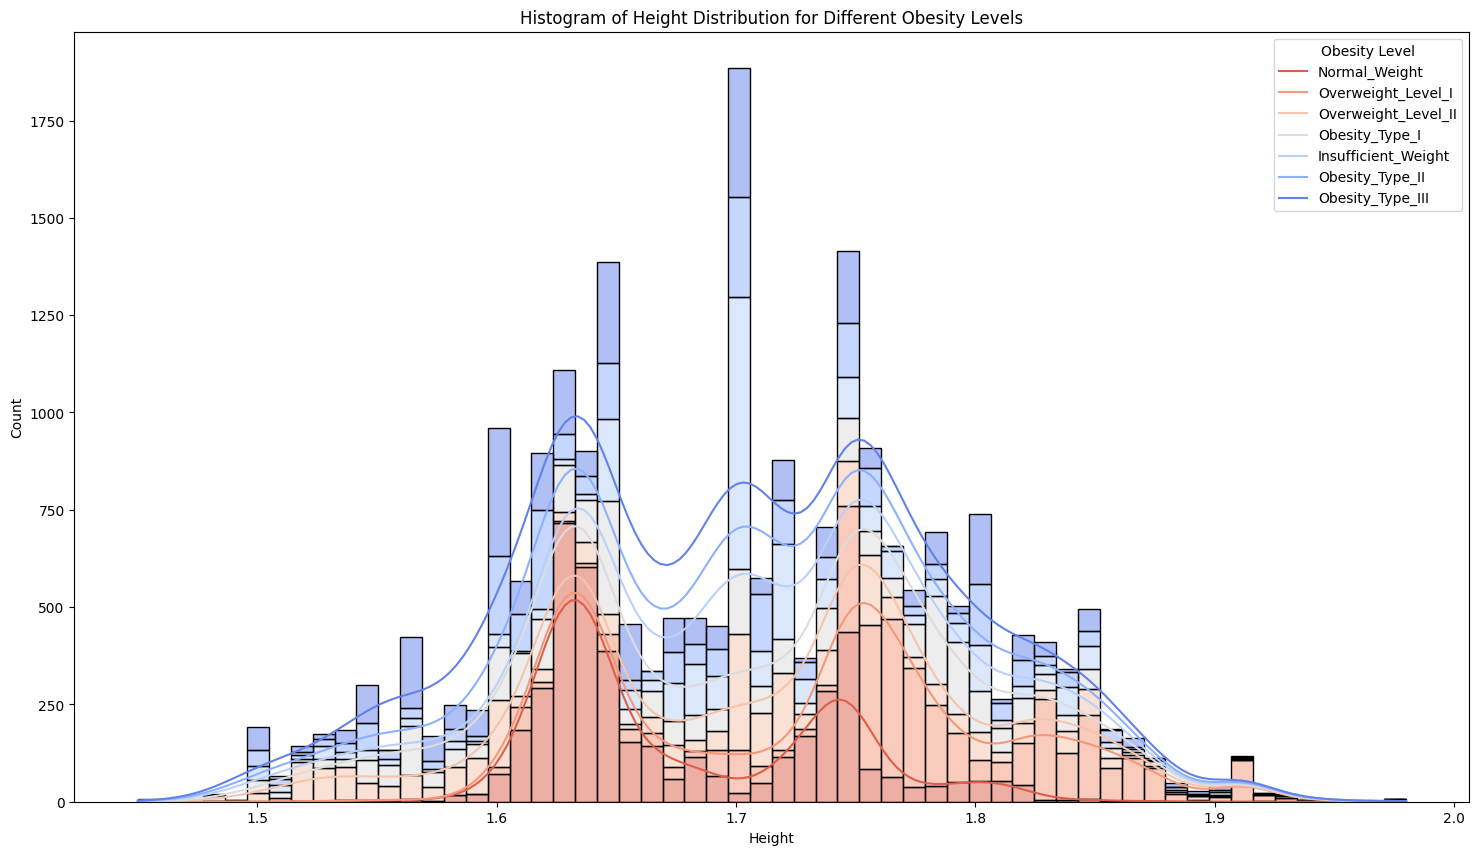

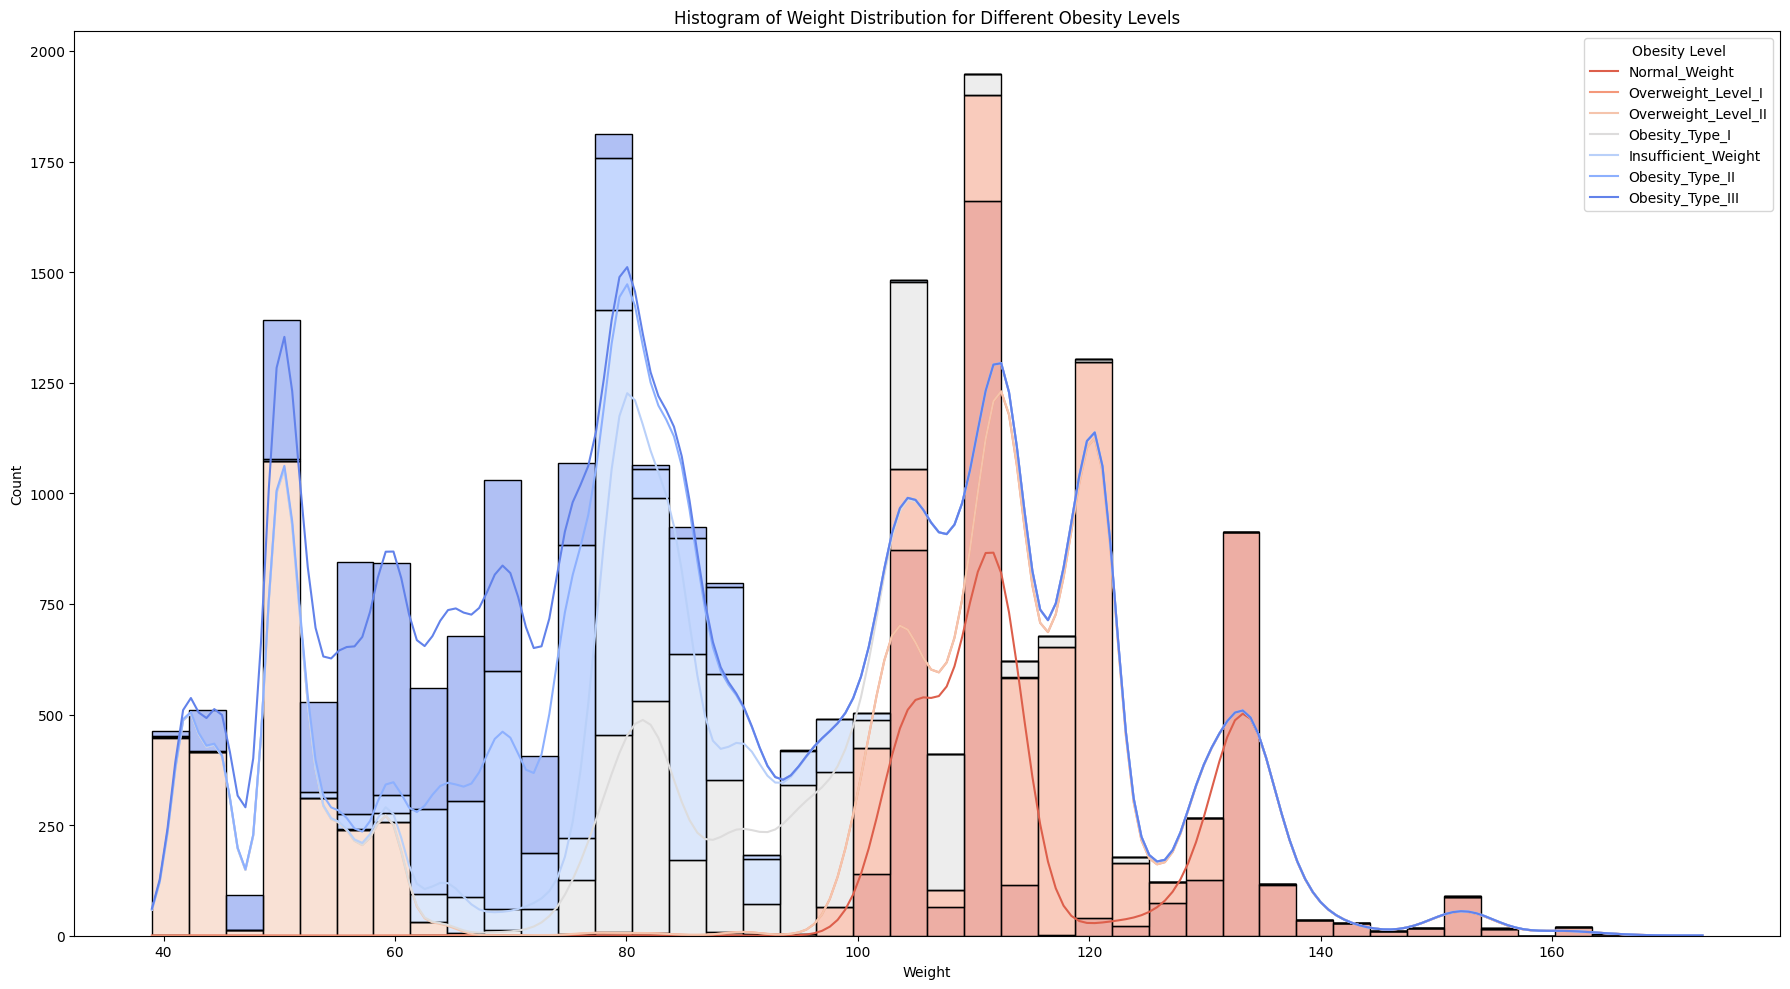

In [ ]:
plt.figure(figsize=(18, 10))
sns.histplot(
    data=merged_df,
    x="Age",
    hue="NObeyesdad",
    multiple="stack",
    palette="coolwarm",
    kde=True,
).set(title="Histogram of Age Distribution for Different Obesity Levels")
plt.legend(title="Obesity Level", labels=merged_df["NObeyesdad"].unique().tolist())

plt.figure(figsize=(18, 10))
sns.histplot(
    data=merged_df,
    x="Height",
    hue="NObeyesdad",
    multiple="stack",
    palette="coolwarm",
    kde=True,
).set(title="Histogram of Height Distribution for Different Obesity Levels")
plt.legend(title="Obesity Level", labels=merged_df["NObeyesdad"].unique().tolist())

plt.figure(figsize=(18, 10))
sns.histplot(
    data=merged_df,
    x="Weight",
    hue="NObeyesdad",
    multiple="stack",
    palette="coolwarm",
    kde=True,
).set(title="Histogram of Weight Distribution for Different Obesity Levels")
plt.legend(title="Obesity Level", labels=merged_df["NObeyesdad"].unique().tolist())

plt.tight_layout()
plt.show()


The histograms show the distribution of Age, Height, and Weight across different Obesity levels:

1. Age: Most obesity levels have a right-skewed distribution, indicating most participants are younger. However, 'Obesity_Type_I', 'Obesity_Type_II', and 'Obesity_Type_III' levels also have a considerable number of older participants.

2. Height: The distributions across different obesity levels are somewhat similar, reflecting a range of heights within each level.

3. Weight: There is a clear separation in the distributions of weight across different obesity levels, indicating a strong relationship between weight and obesity level. As we move from 'Insufficient Weight' to 'Obesity_Type_III', the complete distribution shifts towards higher weights.

These distributions suggest that age and weight may significantly affect obesity level, while height might not play a significant role, although further investigation is still required to confirm these observations.

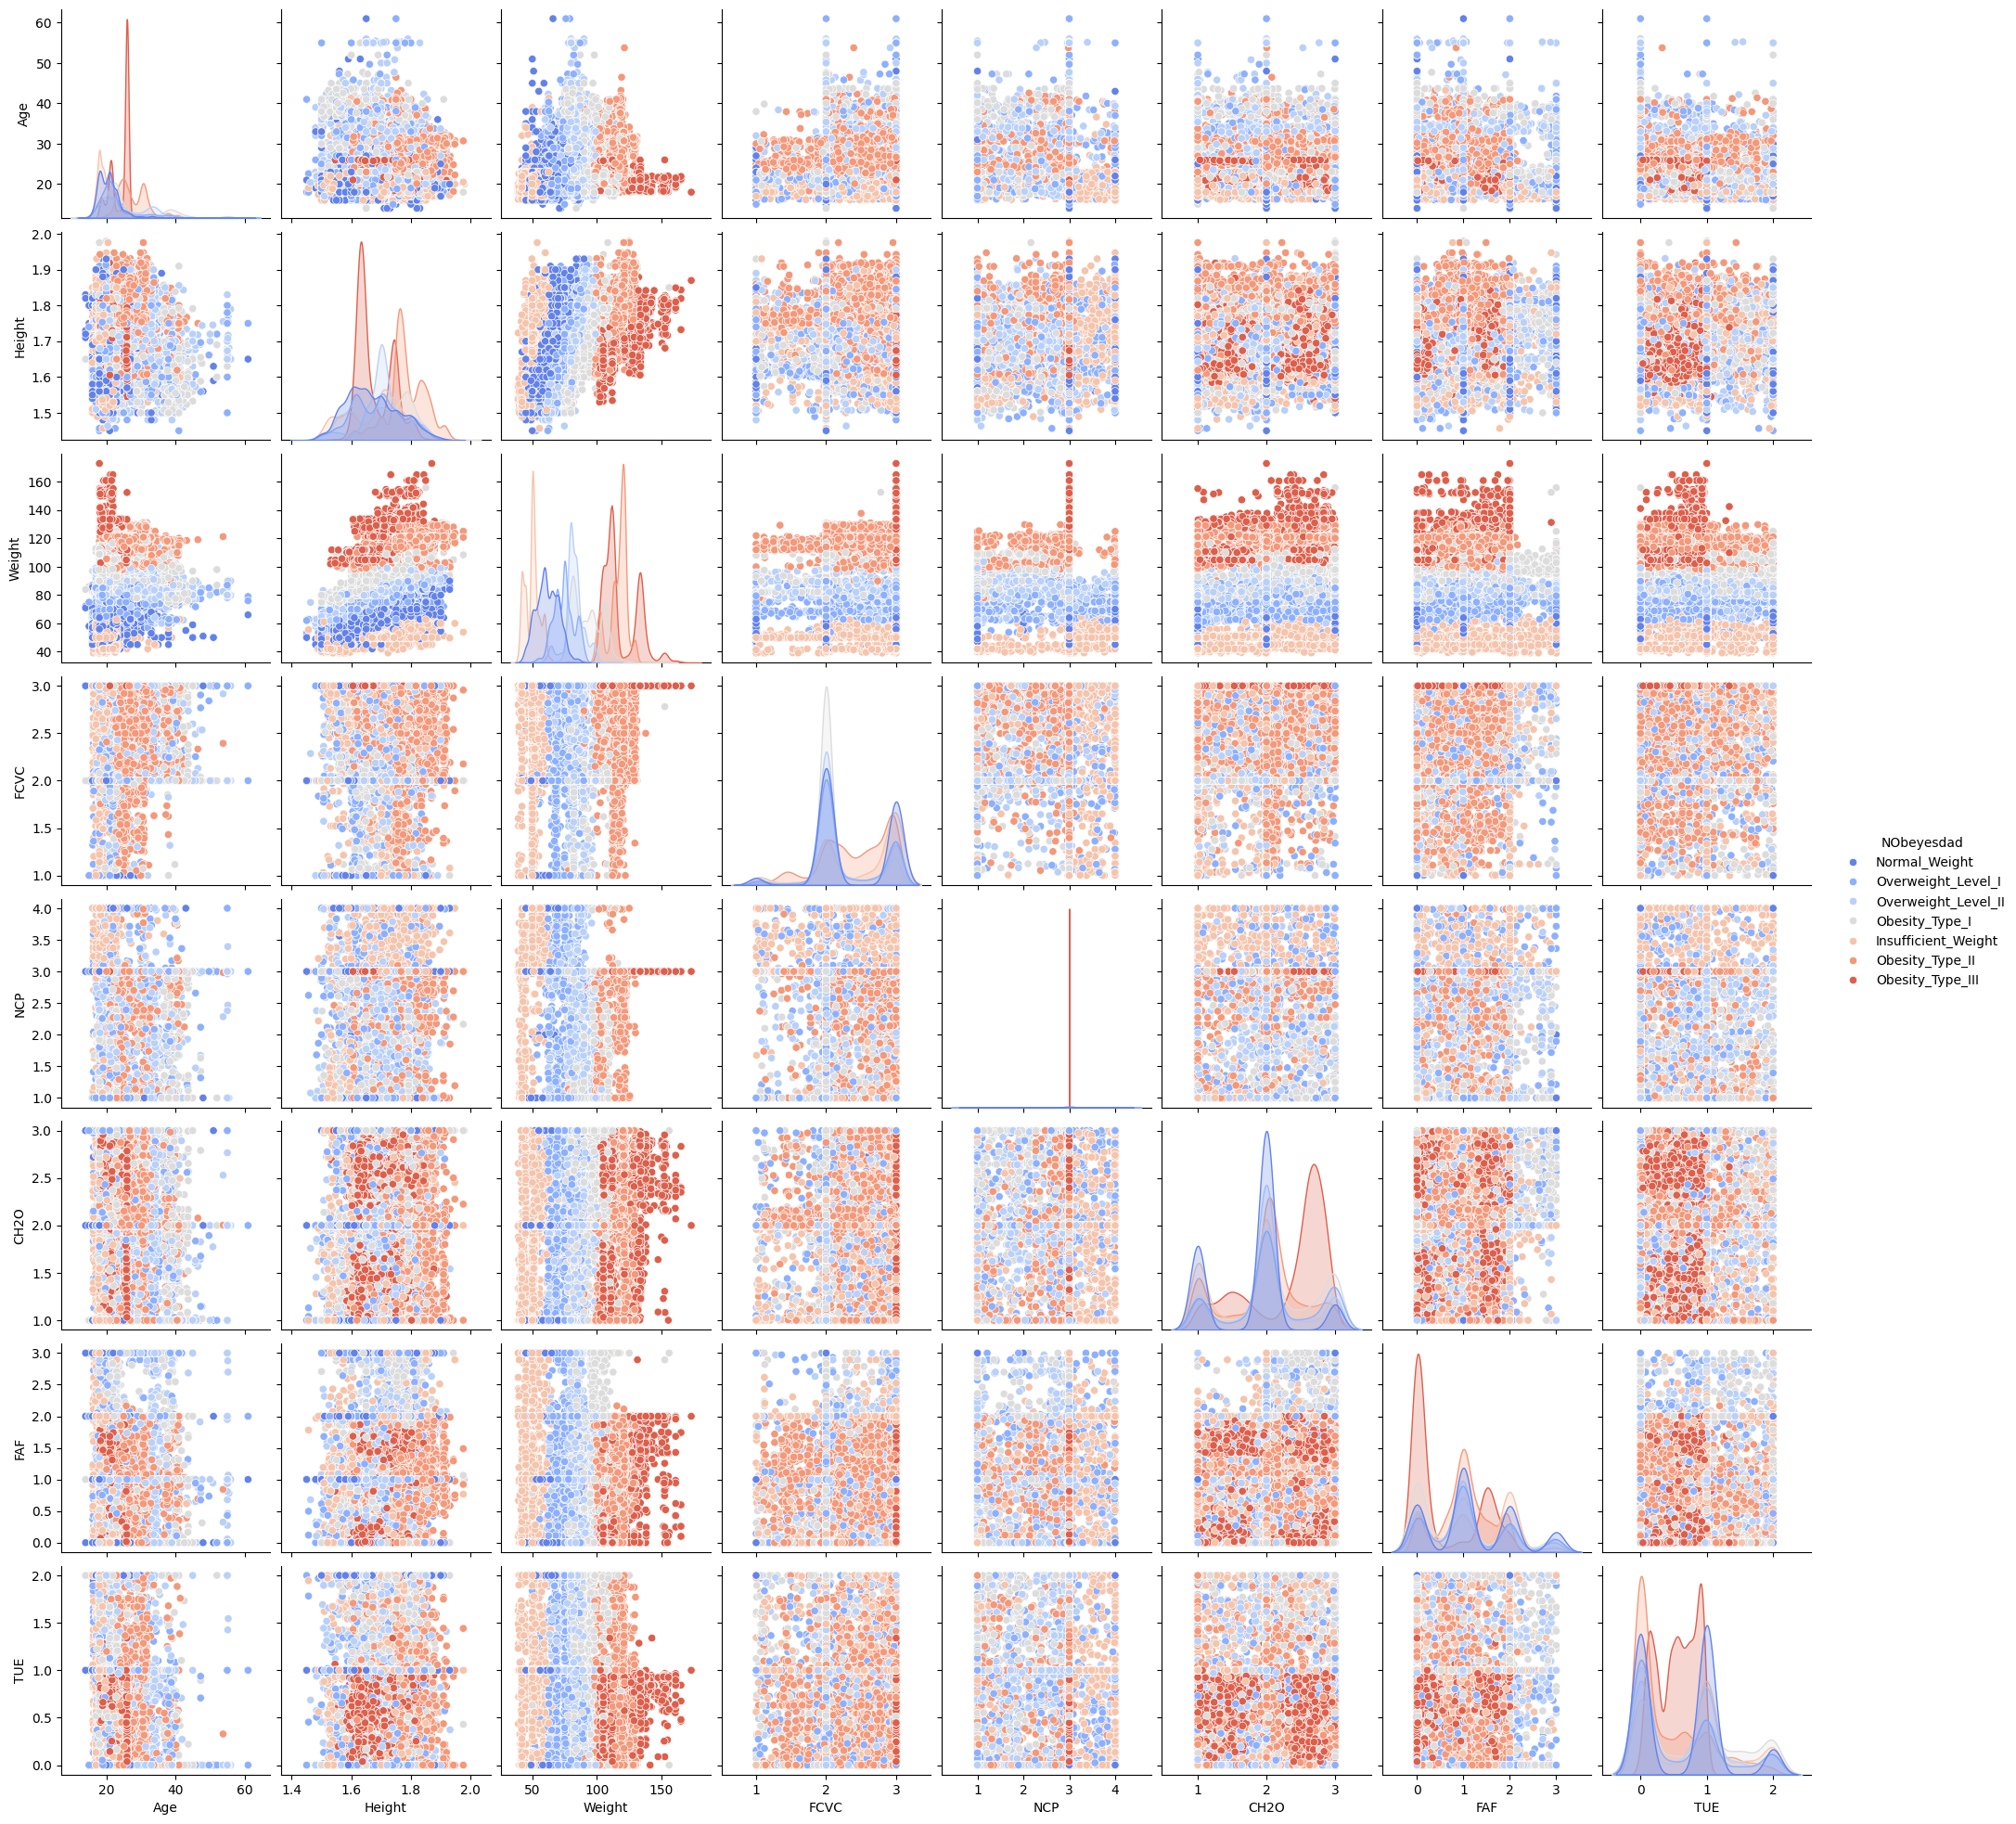

In [ ]:
sns.pairplot(merged_df, vars=numerical_cols, hue="NObeyesdad", palette='coolwarm')
plt.show()

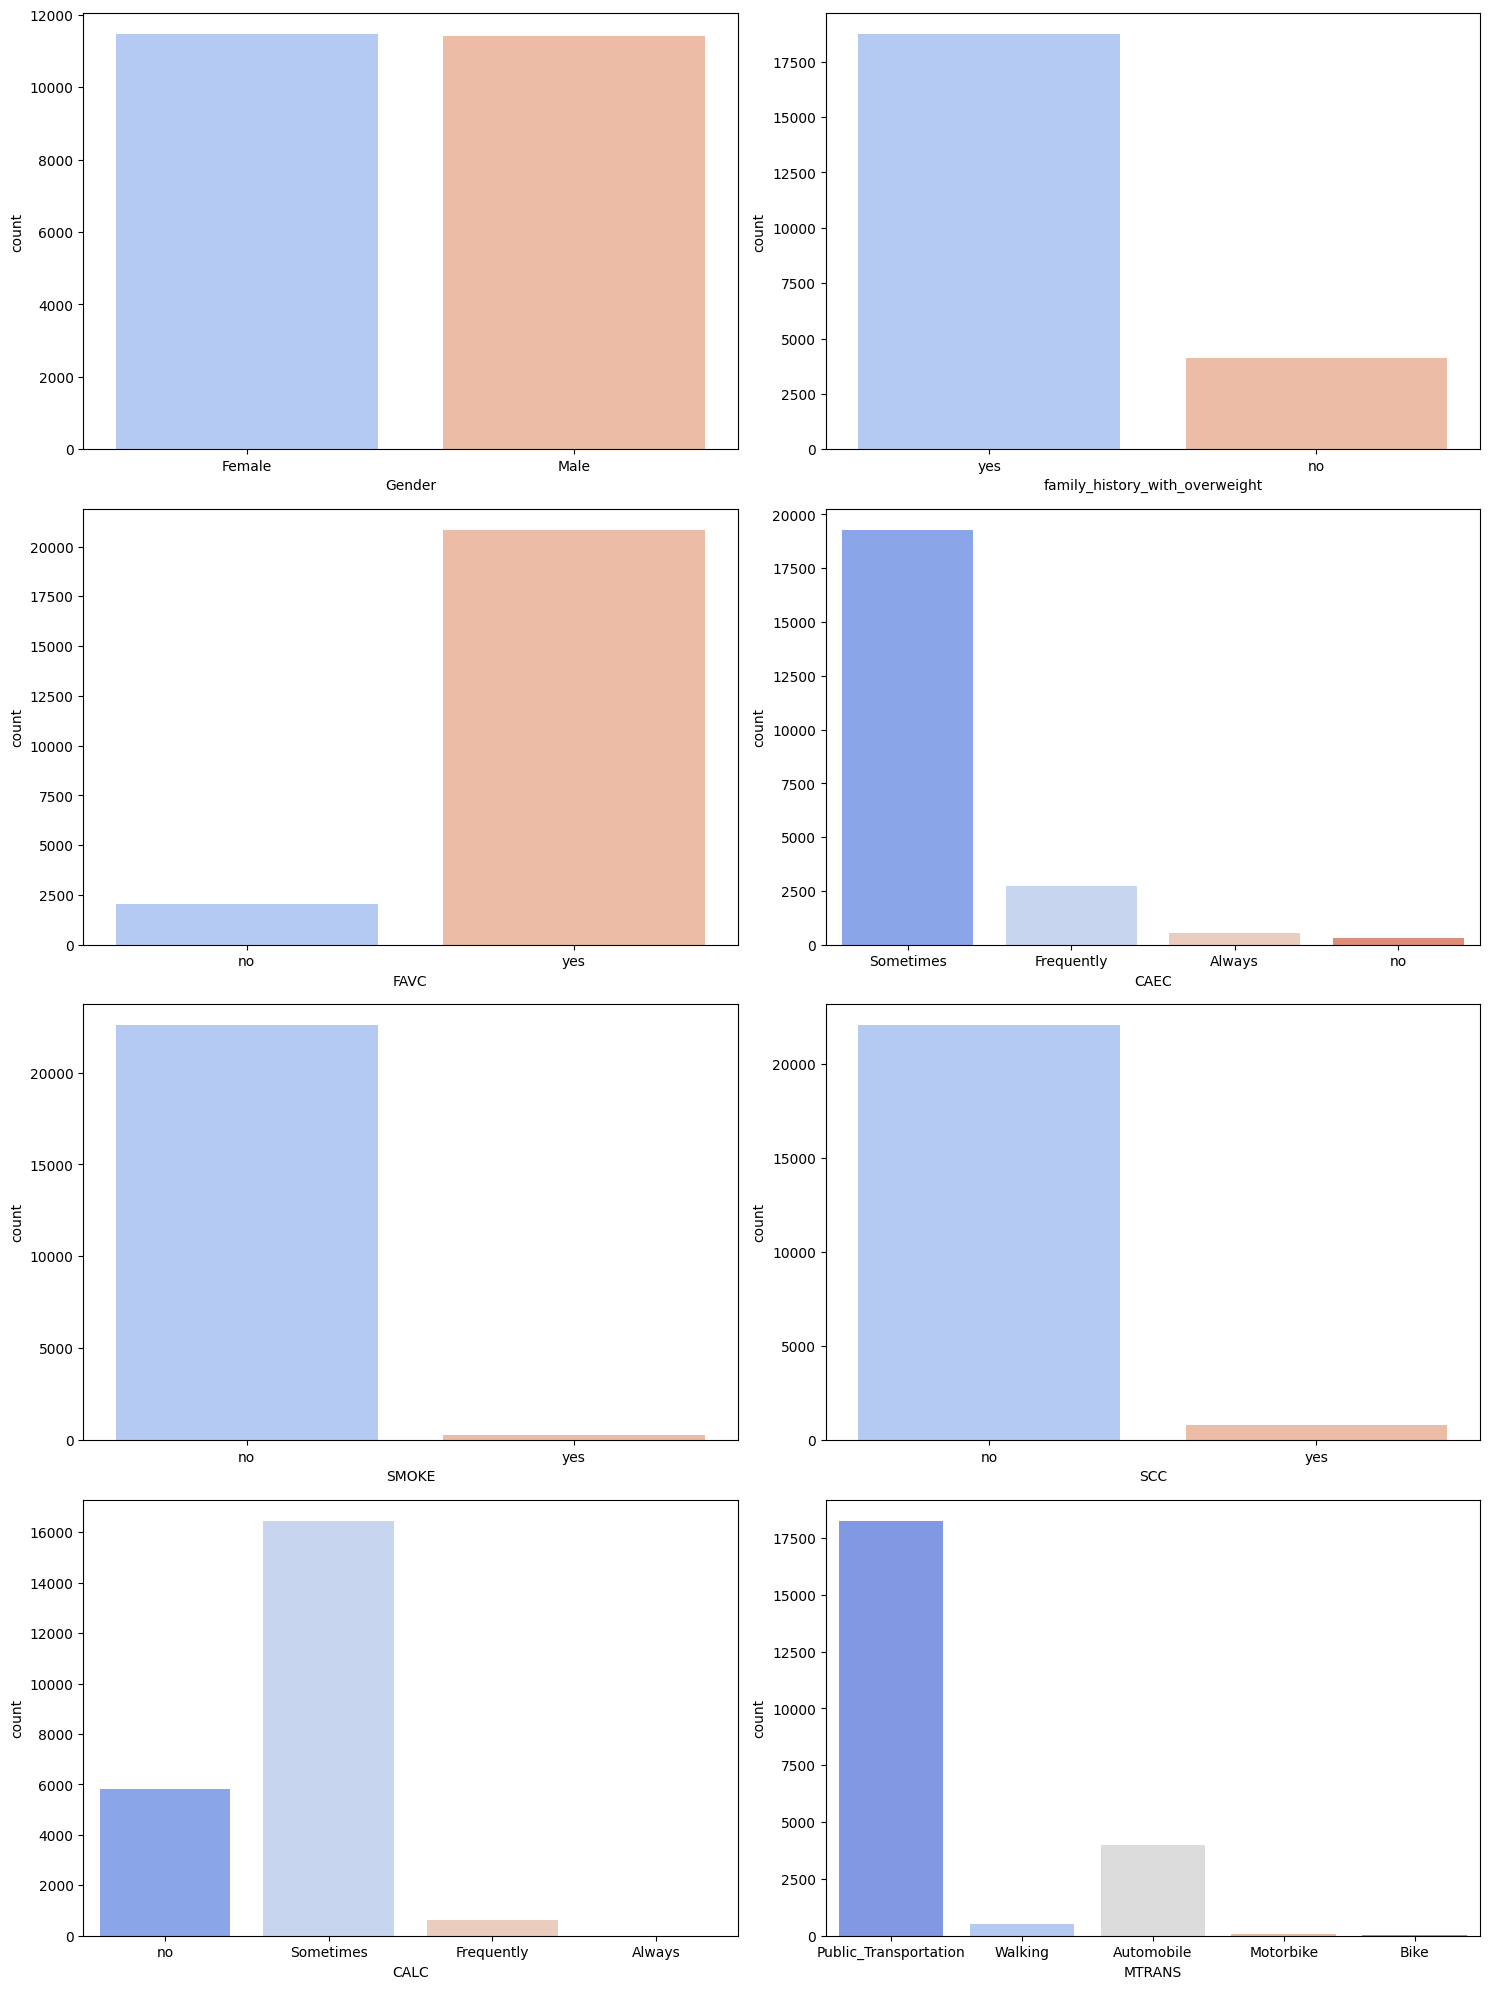

In [ ]:
categorical_variables = [
    "Gender",
    "family_history_with_overweight",
    "FAVC",
    "CAEC",
    "SMOKE",
    "SCC",
    "CALC",
    "MTRANS",
]

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

for i, variable in enumerate(categorical_variables):
    row = i // 2
    col = i % 2
    sns.countplot(data=merged_df, x=variable, ax=axs[row, col], palette="coolwarm")

plt.tight_layout()
plt.show()

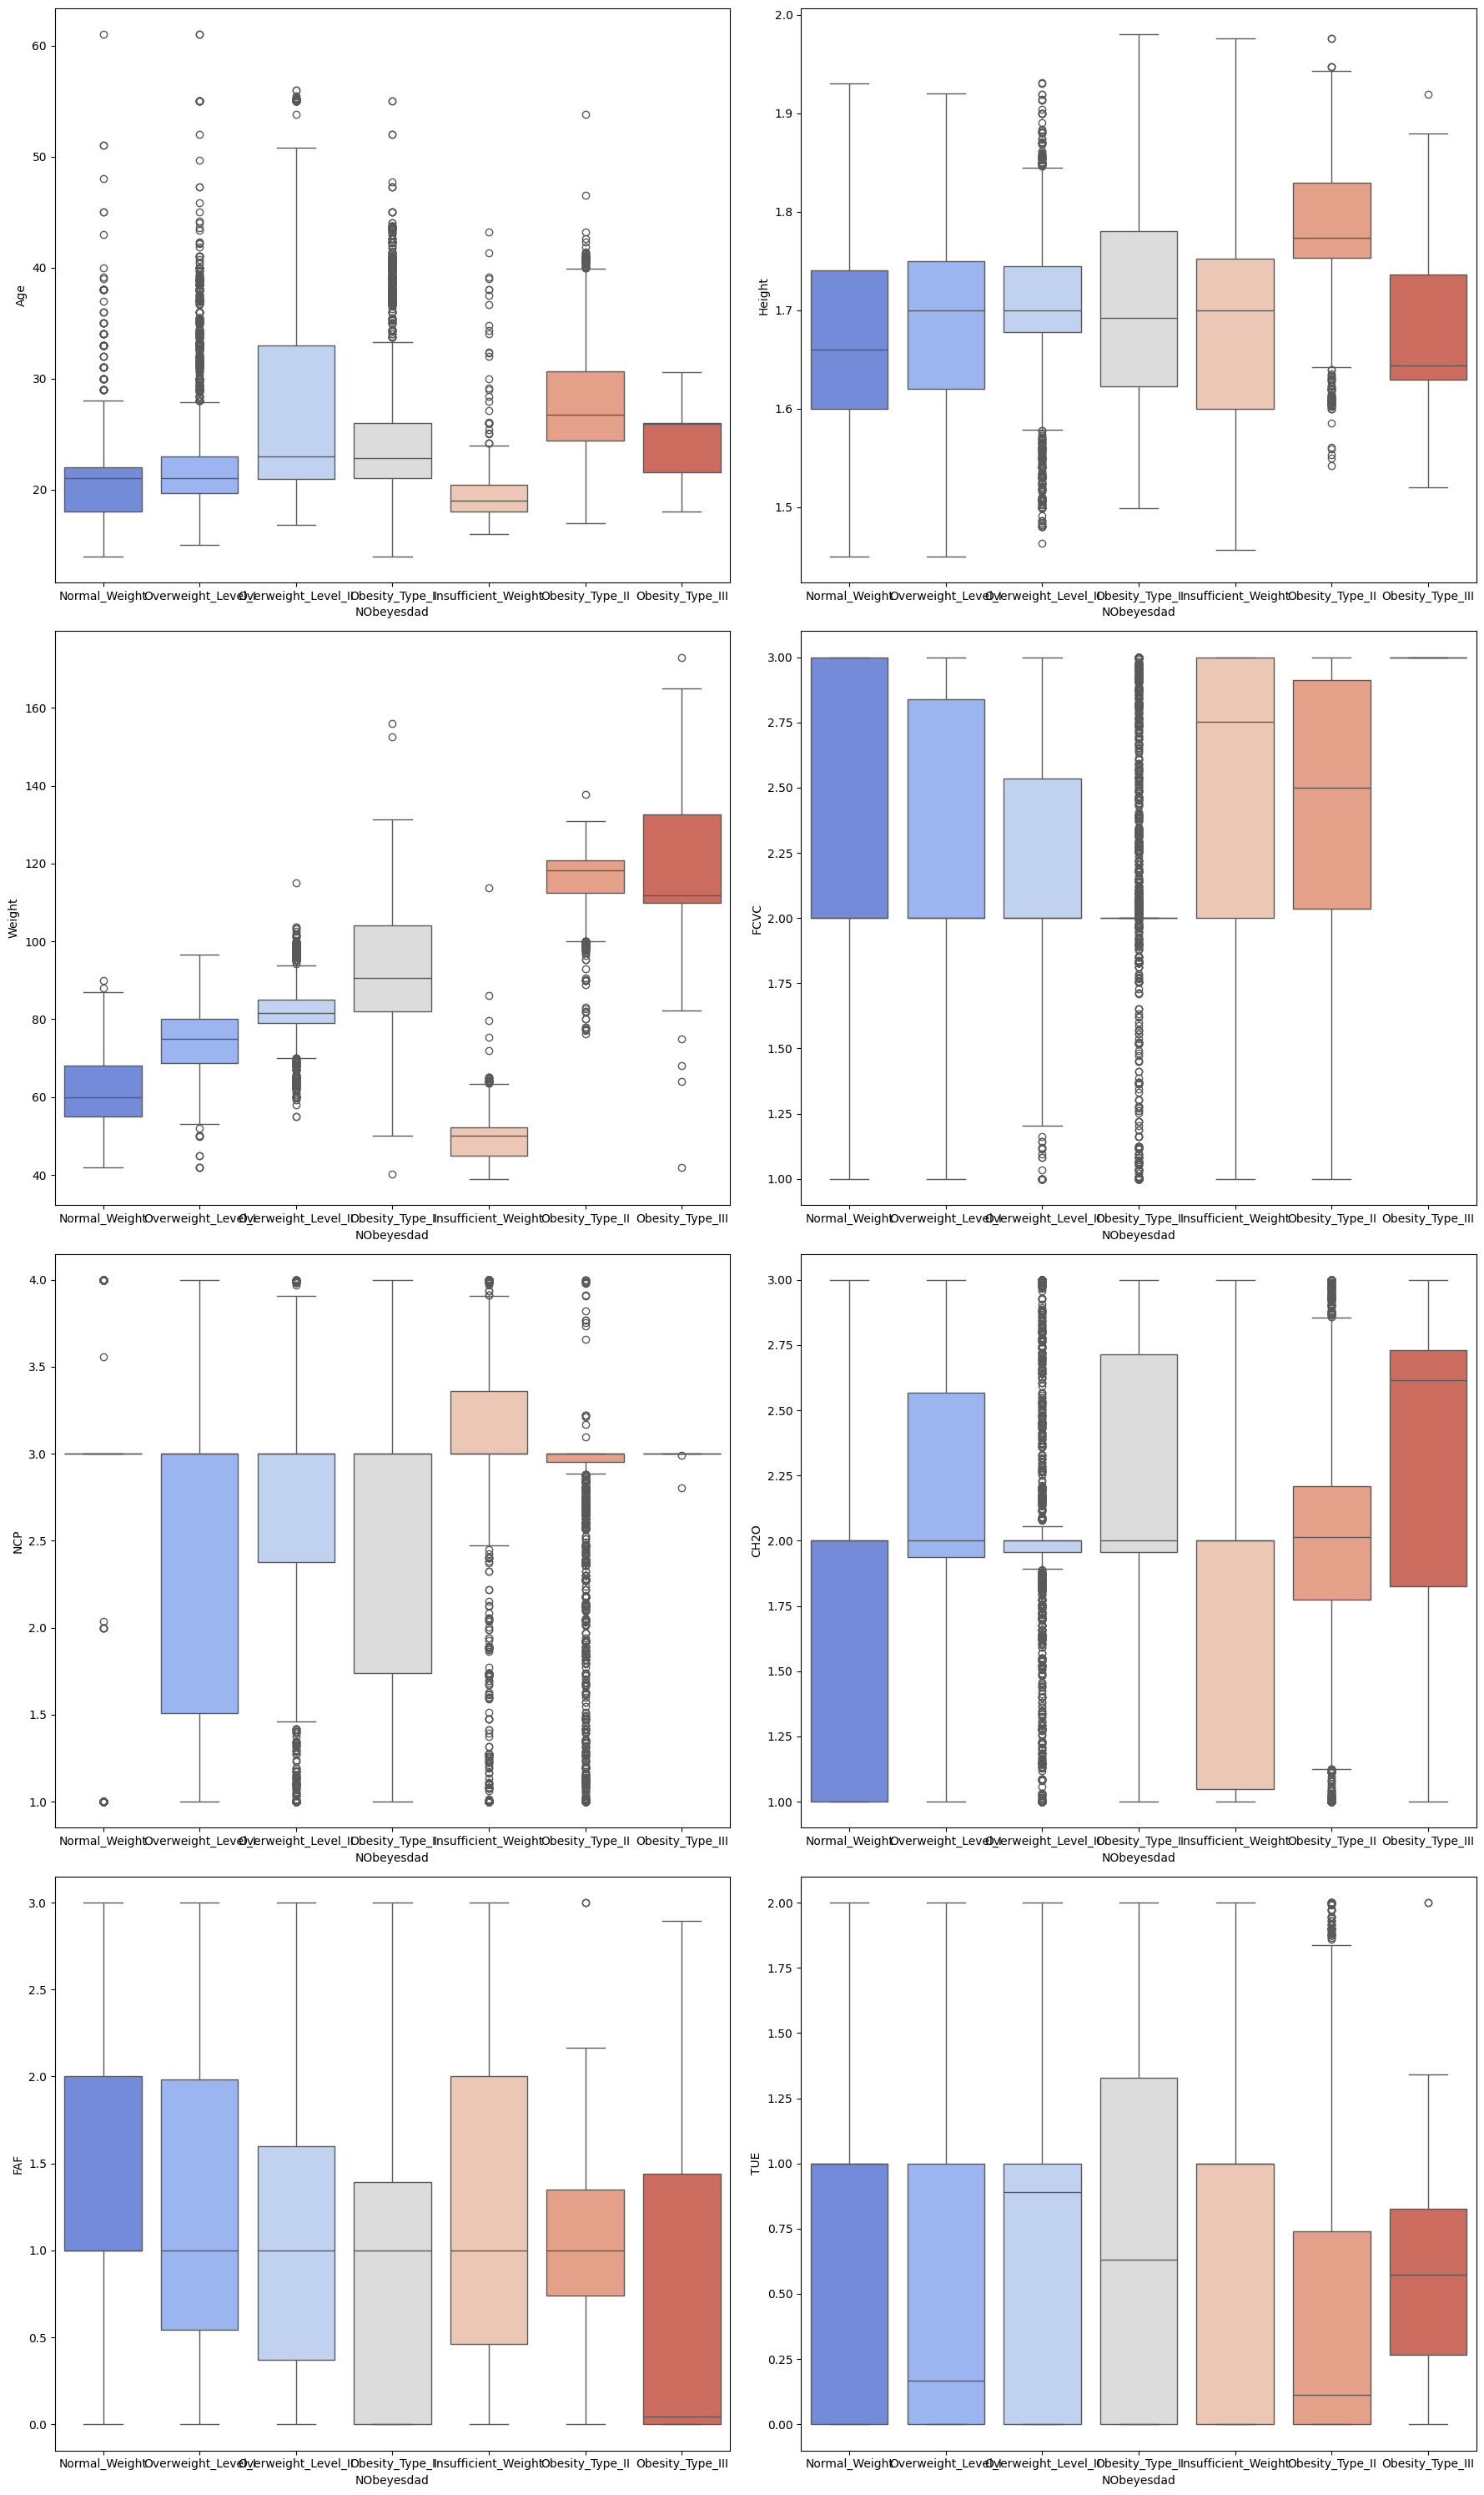

In [ ]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(18, 30))

for i, variable in enumerate(numerical_cols):
    row = i // 2
    col = i % 2
    sns.boxplot(
        x="NObeyesdad", y=variable, data=merged_df, ax=axs[row, col], palette="coolwarm"
    )

plt.tight_layout()
plt.show()

## Statistical tests for significance

In order to perform a significance testing, a common approach is to run a chi-squared test for categorical variables and an Analysis of Variance (ANOVA) test for numerical variables, using the obesity levels ('NObeyesdad') as the target variable. 

These tests will evaluate if the differences across different levels of the target variable are statistically significant for each independent variable. The null hypothesis in these cases is that there is no relationship between the target variable and each independent variable. 

Here, we consider p-value < 0.05 to reject the null hypothesis and conclude that the variable is significant.

In [ ]:
anova_results = []

for variable in numerical_cols:
    data = [
        merged_df.loc[merged_df["NObeyesdad"] == level, variable]
        for level in merged_df["NObeyesdad"].unique()
    ]
    fval, pval = stats.f_oneway(*data)
    anova_results.append([variable, pval])

anova_results_df = pd.DataFrame(anova_results, columns=["Variable", "p-value"])
anova_results_df


Variable        p-value
0      Age   0.000000e+00
1   Height   0.000000e+00
2   Weight   0.000000e+00
3     FCVC   0.000000e+00
4      NCP   0.000000e+00
5     CH2O   0.000000e+00
6      FAF   0.000000e+00
7      TUE  2.539965e-191

The p-values for all the numerical variables are less than 0.05, hence we reject the null hypothesis for these variables. This means there is a significant difference in the means of these numerical variables across the different obesity levels, therefore, all these variables are significant.


In [ ]:

chi2_results = []

for variable in categorical_cols:
    contingency_table = pd.crosstab(merged_df[variable], merged_df["NObeyesdad"])
    chi2, pval, _, _ = chi2_contingency(contingency_table)
    chi2_results.append([variable, pval])

chi2_results_df = pd.DataFrame(chi2_results, columns=["Variable", "p-value"])
chi2_results_df

Variable        p-value
0                          Gender   0.000000e+00
1  family_history_with_overweight   0.000000e+00
2                            FAVC   0.000000e+00
3                            CAEC   0.000000e+00
4                           SMOKE   7.130086e-49
5                             SCC  8.389787e-242
6                            CALC   0.000000e+00
7                          MTRANS   0.000000e+00

The p-values for all the categorical variables are less than 0.05, hence we reject the null hypothesis for these variables. This suggests that the observed association between these categorical variables and the different obesity levels ('NObeyesdad') is statistically significant. Thus, all these variables are significant.


In [ ]:
significance_df = pd.concat([anova_results_df, chi2_results_df], axis=0)
significance_df = significance_df.reset_index(drop=True)

significance_df["is_significant"] = significance_df["p-value"] < 0.05
significance_df

Variable        p-value  is_significant
0                              Age   0.000000e+00            True
1                           Height   0.000000e+00            True
2                           Weight   0.000000e+00            True
3                             FCVC   0.000000e+00            True
4                              NCP   0.000000e+00            True
5                             CH2O   0.000000e+00            True
6                              FAF   0.000000e+00            True
7                              TUE  2.539965e-191            True
8                           Gender   0.000000e+00            True
9   family_history_with_overweight   0.000000e+00            True
10                            FAVC   0.000000e+00            True
11                            CAEC   0.000000e+00            True
12                           SMOKE   7.130086e-49            True
13                             SCC  8.389787e-242            True
14                            CALC   0.000000e+00            True
15                          MTRANS   0.000000e+00            True

The final table portrays the significance of different variables to the target ('NObeyesdad'). The "is_significant" column shows whether a particular variable is statistically significant with respect to the obesity levels. 

The significance test suggests that all variables, both numerical and categorical, are statistically significant when it comes to explaining the observed variation in obesity levels, as they all have p-values less than 0.05. 

Important note: While these variables are statistically significant, this does not speak of the magnitude of the impact each variable has on the target variable. For that, a different model (like regression) would be needed. Also, these tests only capture linear relationships and might miss out on non-linear relationships between variables.

## Outlier, anomaly detection

A common way to detect outliers or anomalies in variables is by using the interquartile range (IQR). IQR is the range between the first quartile (25th percentile) and the third quartile (75th percentile) of the data. Any data point that falls below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR can be considered an outlier.

We can compute the possible presence of anomalies for the numerical variables present in our data frame. These variables include 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF',

In [ ]:
def find_anomalies(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR
    anomalies = [x for x in data if ((x < lower_threshold) | (x > upper_threshold))]
    return {"IQR": IQR, "lower threshold": lower_threshold, "upper threshold": upper_threshold, "anomalies": anomalies}

numerical_variables = ["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]
anomalies = {variable: find_anomalies(merged_df[variable].values) for variable in numerical_variables}

The anomalies for the numerical variables are as follows:

- **Age**: There are numerous values considered as anomalies, many of which are older ages (greater than 35 years). This could be because the dataset has fewer representations from older individuals.
- **Height**: Some height values are considered as anomalies, with majority of the values being either too low (less than 1.45m) or too high (greater than 1.94m). These could be due to the vast differences in height within the population.
- **Weight**: There are a significant number of anomalies, highlighting some individuals with extremely low weight (less than 40kg) and extremely high weight (greater than 120kg). These anomalies mostly correspond to extreme cases of underweight and obesity.
- **FCVC**: Several anomaly values less than 2 and some over 3.25 were observed. This might suggest individuals having very unusual frequency of consumption of high caloric food.
- **NCP**: Relatively few anomalies were present, all of which were below 1.35. This points towards unusual meal habits, like very few main meals.
- **CH2O**: No anomalies were detected, indicating the data for daily water consumption is within the expected range.
- **FAF**: No anomalies were detected, suggesting the frequency of physical activity falls within the expected range.
- **TUE**: No anomalies were detected, indicating the time spent using technology devices is within the expected range.

# Recommendations:
1. **Handling the anomalies**: The nature of these anomalies should be carefully interpreted. For instance, the 'Age' variable should not be corrected or removed because older age is a normal occurrence, despite being rare in this dataset. On the other hand, for 'Height' and 'Weight', values that are physiologically unlikely (e.g., height less than 1 meter or more than 2 meters, weight below 20kg or over 200kg) might be considered for correction or removal, as these could represent measurement or recording errors.

2. **Further investigation**: The variables with anomalies should be investigated further. Use domain knowledge and consider the real-world context to distinguish between real data and possible measurement/entry errors.

3. **Outlier-sensitive methods**: If the anomalies are considered to be physiologically valid, outlier-sensitive methods should be employed for any modeling endeavor, as these points of high leverage can disproportionately affect many statistical models.

4. **Outlier treatment**: For "impossible" anomalies (where corrections are not possible), depending on the proportion of outliers and given the nature of the analyses to be performed, it may be appropriate to either remove these outliers or cap them at a certain value. 

It's worth remembering that these results are based on the IQR method, which is just one approach to anomaly detection. The specific values used to define what constitutes an anomaly (1.5 times the IQR) is somewhat arbitrary and could be adjusted. Other methods (like Z-scores, the DBSCAN clustering algorithm, Isolation Forest, etc.) may be more appropriate depending on the specific nature of the data.


In [ ]:
anomalies_zscore = {}
numeric_df = merged_df[numerical_variables]
z_scores = zscore(numeric_df)
abs_z_scores = np.abs(z_scores)
threshold = 3
anomalies_zscore = abs_z_scores > threshold
zscore_outliers = pd.DataFrame(anomalies_zscore, columns=numerical_variables)
zscore_outliers.sum()


Age       236
Height      6
Weight      1
FCVC        0
NCP         0
CH2O        0
FAF         0
TUE         0
dtype: int64

Using the Z-score method with a threshold of 3 standard deviations from the mean, we found some potential outliers in our numerical variables:

- Age has 236 potential outliers, indicating some unusually young or old ages are present in the dataset.
- Height has 6 potential outliers, indicating some people in the dataset have unusual heights.
- Weight has 1 potential outlier, indicating a weight measurement that stands out from the average.

It's important to understand that an outlier is not necessarily a bad thing or a data entry error. They can also indicate something scientifically interesting, depending on the nature and scientific understanding of the variables. Investigations would be needed to further understand these outliers.

Also, similar to the IQR method, the Z-Score method assumes a Gaussian distribution of data. In case of non-normally distributed data, these methods can flag too many or too few data points as outliers. Other methods such as DBSCAN clustering or Isolation Forest can offer alternative ways for outlier detection depending on the nature of the data and the specific use case.

In [ ]:
scaled_features = StandardScaler().fit_transform(numeric_df.values)

db = DBSCAN(eps=3, min_samples=2)
db.fit(scaled_features)

anomalies_dbscan = db.labels_ == -1

db_anomalies = pd.Series(anomalies_dbscan).value_counts()

db_anomalies


False    22869
Name: count, dtype: int64

The DBSCAN algorithm did not detect any anomalies with the parameters we provided (`eps=3`, `min_samples=2`). Keep in mind that DBSCAN is highly dependent on the parameters. Adjusting the `eps` and `min_samples` parameters could potentially identify outliers.


## Feature engineering

In [ ]:
def create_features(df):
    # Calculates log-transformed Body Mass Index (BMI) for better normalization of data.
    df["log_BMI"] = np.log(df["Weight"] / (df["Height"] ** 2) + 1e-6)

    # Categorizes individuals into age groups to identify age-related trends.
    df["age_group"] = pd.cut(
        df["Age"],
        bins=[0, 18, 30, 40, 50, 60, np.inf],
        labels=["<18", "18-30", "30-40", "40-50", "50-60", "60+"],
    )

    # Computes a physical activity score to quantify participants' physical activity levels.
    df["physical_activity_score"] = df["FAF"] * 2 + (1 - df["TUE"] / 2)

    # Determines the tendency of caloric intake based on frequency of consuming high-caloric food and vegetables.
    df["caloric_intake_tendency"] = (
        df["FAVC"].apply(lambda x: 1 if x == "yes" else 0)
        + (df["FCVC"] / 3)
        + (1 - (df["NCP"] / 4))
    )

    # Mapping CAEC values to numeric scores.
    caec_mapping = {"no": 0, "Sometimes": 1, "Frequently": 2, "Always": 3}
    df["CAEC"] = df["CAEC"].map(caec_mapping)

    # Establishes a healthy eating score based on vegetable consumption frequency and eating habits.
    df["healthy_eating_score"] = 2 * df["FCVC"] + df["NCP"] - df["CAEC"]

    # Calculates Basal Metabolic Rate (BMR) for each individual using the Mifflin-St Jeor Equation, considering gender differentiation.
    df["BMR"] = df.apply(
        lambda row: (10 * row["Weight"])
        + (6.25 * (row["Height"] * 100))
        - (5 * row["Age"])
        + (5 if row["Gender"] == "Male" else -161),
        axis=1,
    )

    # Evaluates meal regularity by counting the main meals.
    df["meal_regularity_score"] = df["NCP"].apply(lambda x: 1 if x >= 3 else 0)

    # Assesses snacking habit based on consumption of high caloric food and sweets.
    df["snacking_habit"] = (
        df["FAVC"].apply(lambda x: 1 if x == "yes" else 0) + df["CAEC"]
    )

    # Indicates stress eating based on the relationship of physical activity score and meal regularity.
    df["stress_eating_indicator"] = (2 - df["physical_activity_score"]) * (
        1 - df["meal_regularity_score"] / 2
    )

    # Scores sedentary lifestyle based on time spent using technology devices.
    df["sedentary_lifestyle_score"] = df["TUE"].apply(
        lambda x: 2 if x > 4 else 1 if x <= 4 and x > 0 else 0
    )

    # Calculates an overall lifestyle score combining physical activity, healthy eating, meal regularity and less snacking habit.
    df["overall_lifestyle_score"] = (
        df["physical_activity_score"]
        + df["healthy_eating_score"]
        + df["meal_regularity_score"]
        - df["snacking_habit"]
        + df["stress_eating_indicator"] * 2
        + df["sedentary_lifestyle_score"] * 2
        + 1
    )
    # Feature generation (exp, log, sqrt, interact, etc.)
    # Log transformation for continuous variables
    df["log_Age"] = np.log(df["Age"] + 1)
    df["log_Height"] = np.log(df["Height"] + 1)
    df["log_Weight"] = np.log(df["Weight"] + 1)

    # Square root transformation
    df["sqrt_FCVC"] = np.sqrt(df["FCVC"])
    df["sqrt_NCP"] = np.sqrt(df["NCP"])
    df["sqrt_CH2O"] = np.sqrt(df["CH2O"])

    # Interaction terms
    df["Height_Weight_interaction"] = df["Height"] * df["Weight"]
    df["Age_FCVC_interaction"] = df["Age"] * df["FCVC"]

    return df


train_df = pd.read_csv("train.csv")
obesity_df = pd.read_csv("ObesityDataSet.csv")
merged_df = pd.concat([train_df, obesity_df])

merged_df = create_features(merged_df)
merged_df


id  Gender        Age    Height      Weight  \
0     0.0    Male  24.443011  1.699998   81.669950   
1     1.0  Female  18.000000  1.560000   57.000000   
2     2.0  Female  18.000000  1.711460   50.165754   
3     3.0  Female  20.952737  1.710730  131.274851   
4     4.0    Male  31.641081  1.914186   93.798055   
...   ...     ...        ...       ...         ...   
2106  NaN  Female  20.976842  1.710730  131.408528   
2107  NaN  Female  21.982942  1.748584  133.742943   
2108  NaN  Female  22.524036  1.752206  133.689352   
2109  NaN  Female  24.361936  1.739450  133.346641   
2110  NaN  Female  23.664709  1.738836  133.472641   

     family_history_with_overweight FAVC      FCVC       NCP  CAEC  ...  \
0                               yes  yes  2.000000  2.983297     1  ...   
1                               yes  yes  2.000000  3.000000     2  ...   
2                               yes  yes  1.880534  1.411685     1  ...   
3                               yes  yes  3.000000  3.000000     1  ...   
4                               yes  yes  2.679664  1.971472     1  ...   
...                             ...  ...       ...       ...   ...  ...   
2106                            yes  yes  3.000000  3.000000     1  ...   
2107                            yes  yes  3.000000  3.000000     1  ...   
2108                            yes  yes  3.000000  3.000000     1  ...   
2109                            yes  yes  3.000000  3.000000     1  ...   
2110                            yes  yes  3.000000  3.000000     1  ...   

     sedentary_lifestyle_score  overall_lifestyle_score   log_Age  log_Height  \
0                            1                10.471533  3.236441    0.993251   
1                            1                 8.000000  2.944439    0.940007   
2                            1                 7.277455  2.944439    0.997487   
3                            1                12.000000  3.088892    0.997218   
4                            1                 6.860715  3.485572    1.069591   
...                        ...                      ...       ...         ...   
2106                         1                12.000000  3.089989    0.997218   
2107                         1                12.000000  3.134752    1.011086   
2108                         1                12.000000  3.158023    1.012403   
2109                         1                12.000000  3.233249    1.007757   
2110                         1                12.000000  3.205373    1.007533   

      log_Weight sqrt_FCVC  sqrt_NCP sqrt_CH2O  Height_Weight_interaction  \
0       4.414856  1.414214  1.727222  1.662400                 138.838752   
1       4.060443  1.414214  1.732051  1.414214                  88.920000   
2       3.935070  1.371326  1.188144  1.382164                  85.856681   
3       4.884882  1.732051  1.732051  1.293855                 224.575826   
4       4.551749  1.636968  1.404091  1.407071                 179.546924   
...          ...       ...       ...       ...                        ...   
2106    4.885892  1.732051  1.732051  1.314587                 224.804511   
2107    4.903369  1.732051  1.732051  1.416026                 233.860770   
2108    4.902971  1.732051  1.732051  1.433246                 234.251285   
2109    4.900423  1.732051  1.732051  1.688887                 231.949815   
2110    4.901361  1.732051  1.732051  1.692192                 232.087033   

     Age_FCVC_interaction  
0               48.886022  
1               36.000000  
2               33.849612  
3               62.858211  
4               84.787466  
...                   ...  
2106            62.930526  
2107            65.948826  
2108            67.572108  
2109            73.085808  
2110            70.994127  

[22869 rows x 37 columns]

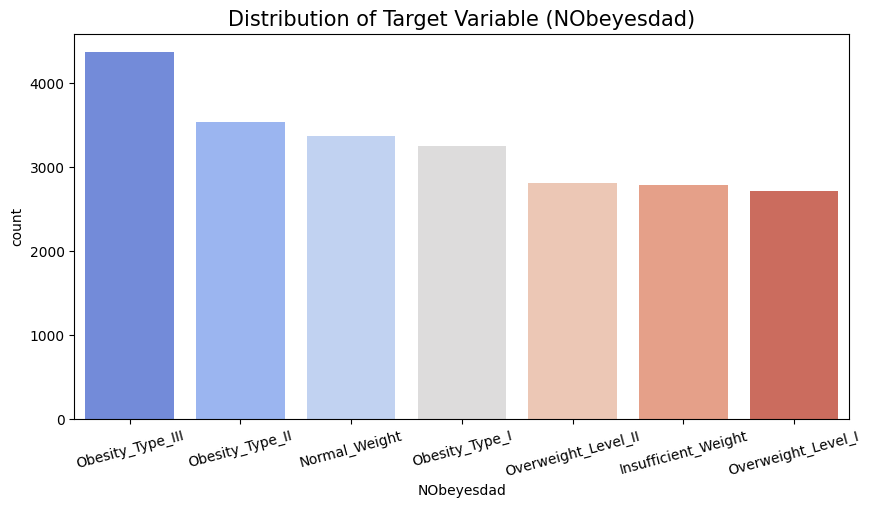

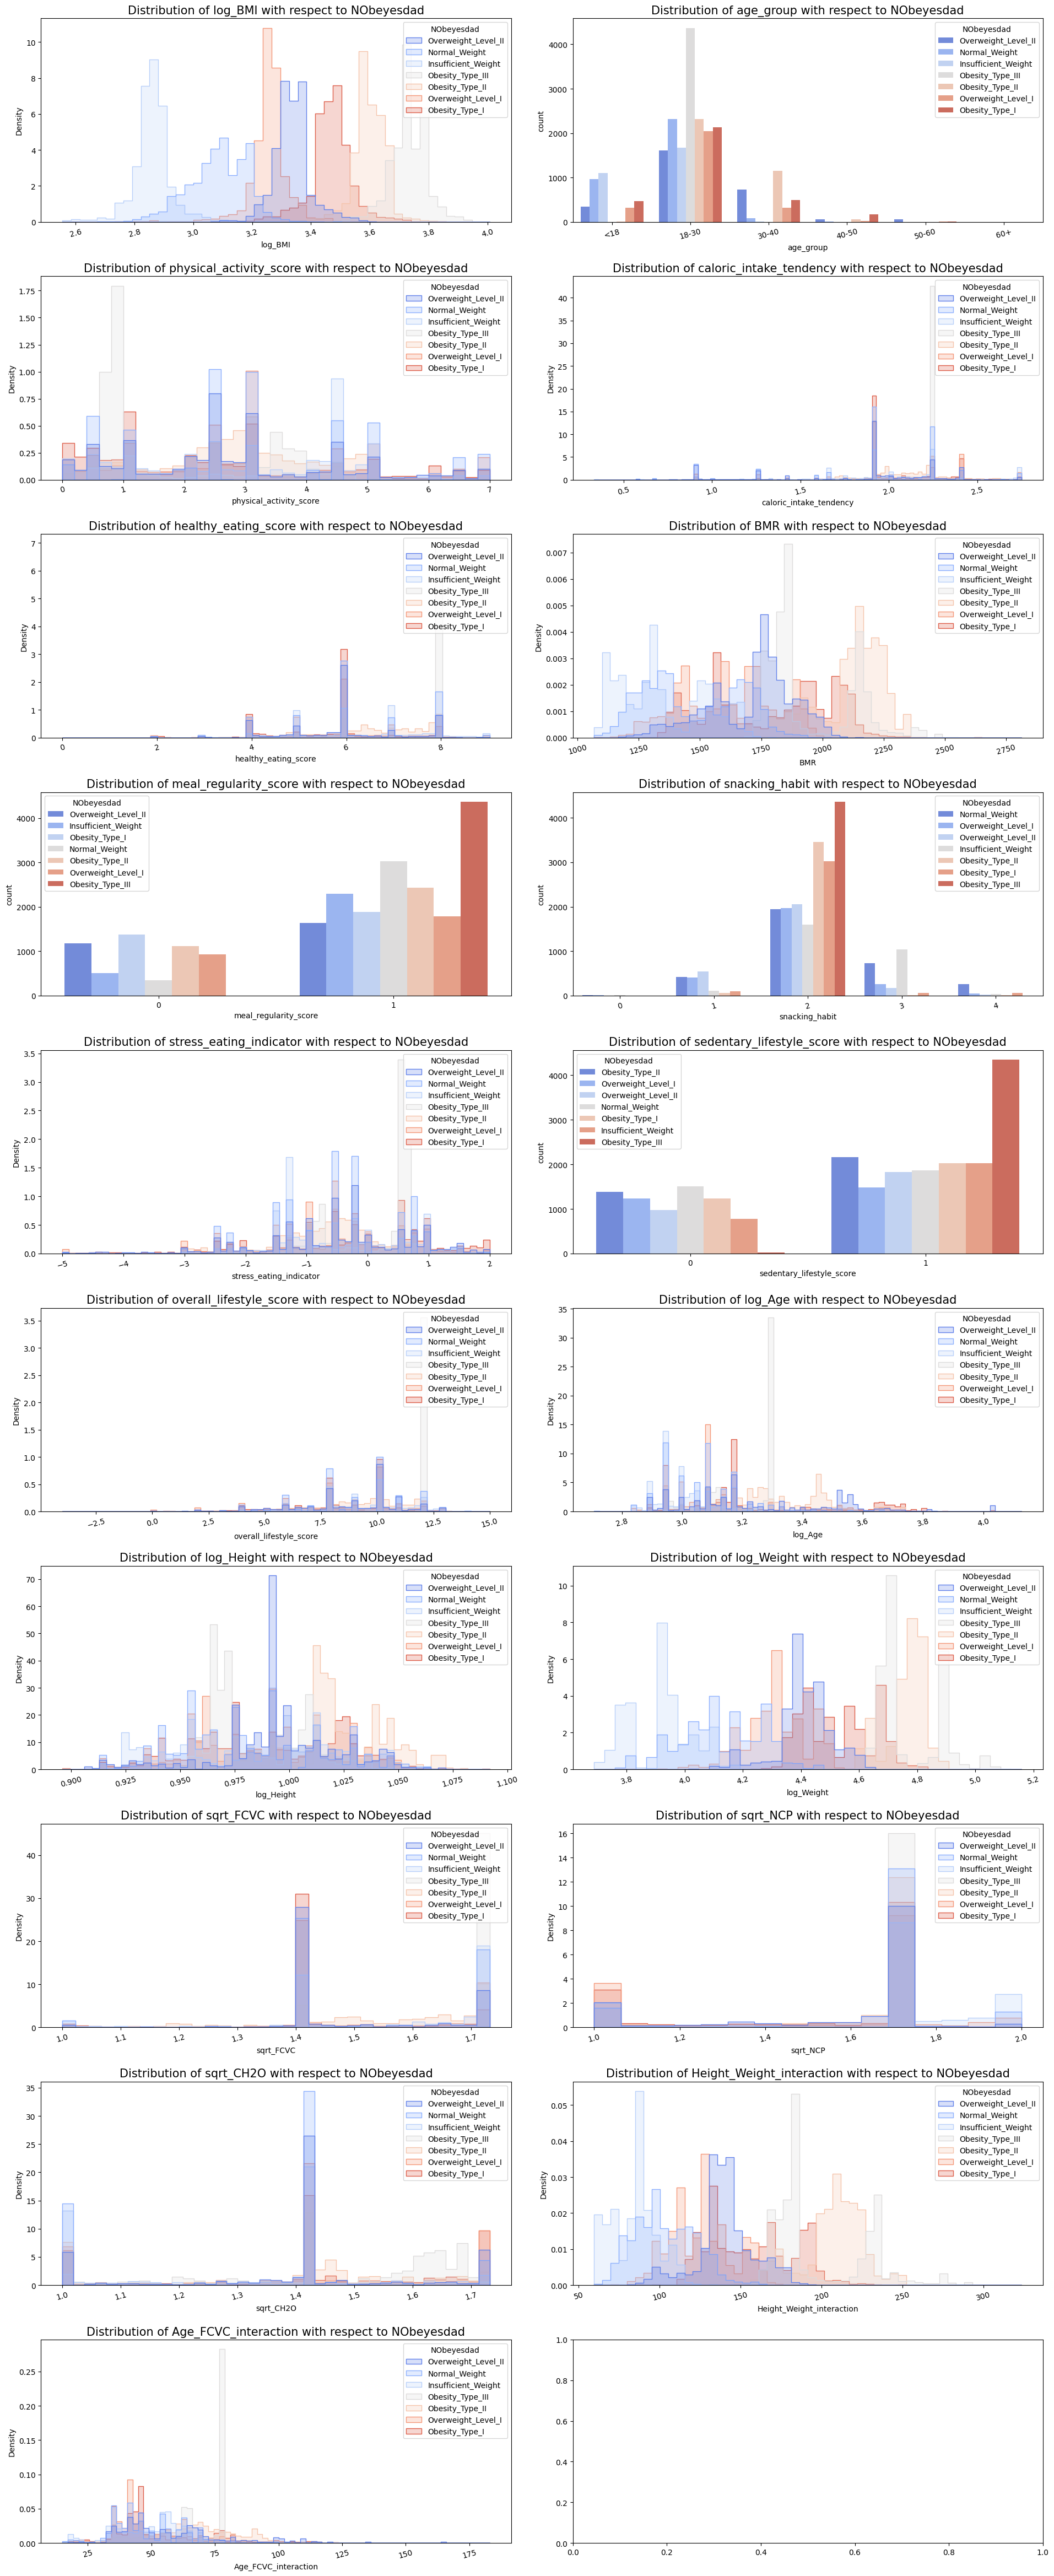

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(
    data=merged_df,
    x="NObeyesdad",
    order=merged_df["NObeyesdad"].value_counts().index,
    palette="coolwarm",
)
plt.title("Distribution of Target Variable (NObeyesdad)", size=15)
plt.xticks(rotation=15)
plt.show()

new_features = [
    "log_BMI",
    "age_group",
    "physical_activity_score",
    "caloric_intake_tendency",
    "healthy_eating_score",
    "BMR",
    "meal_regularity_score",
    "snacking_habit",
    "stress_eating_indicator",
    "sedentary_lifestyle_score",
    "overall_lifestyle_score",
    "log_Age",
    "log_Height",
    "log_Weight",
    "sqrt_FCVC",
    "sqrt_NCP",
    "sqrt_CH2O",
    "Height_Weight_interaction",
    "Age_FCVC_interaction",
]

fig, axes = plt.subplots(
    len(new_features) // 2 + len(new_features) % 2,
    2,
    figsize=(20, len(new_features) * 2.5),
)
fig.tight_layout(pad=5.0)

for i, feature in enumerate(new_features):
    ax = axes[i // 2, i % 2]
    if merged_df[feature].nunique() > 20:
        sns.histplot(
            data=merged_df,
            x=feature,
            hue="NObeyesdad",
            element="step",
            stat="density",
            common_norm=False,
            palette="coolwarm",
            ax=ax,
        )
    else:
        sns.countplot(
            data=merged_df, x=feature, hue="NObeyesdad", palette="coolwarm", ax=ax
        )
    ax.set_title(f"Distribution of {feature} with respect to NObeyesdad", size=15)
    ax.tick_params(axis="x", rotation=15 if merged_df[feature].nunique() > 2 else 0)

plt.show()

The plots display the distributions of the target variable "NObeyesdad", denoting the level of obesity among individuals, and the newly created features from the feature engineering step.

It can be observed from the graphs that:

- The target feature "NObeyesdad" is relatively balanced with all categories having substantial representations.
- "log_BMI", "caloric_intake_tendency", "healthy_eating_score", "BMR", "overall_lifestyle_score", "log_Age", "log_Height", "log_Weight", "sqrt_FCVC", "sqrt_NCP", "sqrt_CH2O", "Height_Weight_interaction", and "Age_FCVC_interaction" are continuous variables. Their distributions differ across different obesity levels, which might indicate their potential in distinguishing these levels.

- "age_group", "physical_activity_score", "meal_regularity_score", "snacking_habit", "stress_eating_indicator", and "sedentary_lifestyle_score" are categorical or discrete variables. In some of these features, different obesity levels have differing counts, which might be helpful in predicting obesity levels.

This is preliminary and we would further validate the importance of these features through appropriate feature selection or importance methods during the modeling phase.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
merged_df['NObeyesdad_encoded'] = le.fit_transform(merged_df['NObeyesdad'])

correlations = (
    merged_df[new_features + ["NObeyesdad_encoded"]]
    .corr()["NObeyesdad_encoded"]
    .sort_values(ascending=False)
)

correlations

NObeyesdad_encoded           1.000000
log_BMI                      0.518074
log_Weight                   0.491421
Height_Weight_interaction    0.397139
BMR                          0.354718
log_Age                      0.301970
Age_FCVC_interaction         0.233025
sqrt_CH2O                    0.179316
healthy_eating_score         0.080303
overall_lifestyle_score      0.076461
caloric_intake_tendency      0.073313
log_Height                   0.061306
sedentary_lifestyle_score    0.053520
sqrt_FCVC                    0.043302
stress_eating_indicator      0.037116
sqrt_NCP                    -0.074566
physical_activity_score     -0.085256
meal_regularity_score       -0.099500
snacking_habit              -0.261310
Name: NObeyesdad_encoded, dtype: float64

In [ ]:
# The three features which are most correlated to the target variable 'NObeyesdad' are 'log_BMI', 'log_Weight', and 'Height_Weight_interaction'.
# Now we need to ensure that these features are not multi-collinear themselves.
# We calculate the correlation matrix amongst these three features.

# Getting the correlation matrix
correlation_matrix = merged_df[["log_BMI", "log_Weight", "Height_Weight_interaction"]].corr()
correlation_matrix

log_BMI  log_Weight  Height_Weight_interaction
log_BMI                    1.000000    0.946460                   0.875963
log_Weight                 0.946460    1.000000                   0.974376
Height_Weight_interaction  0.875963    0.974376                   1.000000

The high correlation values in the correlation matrix show that the features 'log_BMI', 'log_Weight', and 'Height_Weight_interaction' are highly linearly dependent (multicollinear). Multicollinearity can hinder the interpretability of the coefficient estimates in various models. Therefore, I will select the top correlated feature ('log_BMI') and then proceed to the next non-multicollinear top correlated features. 

In [ ]:
# Creating a set for highly correlated features
highly_correlated_features = set()

# Looping through the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.75:  # If correlation is significant (> 0.75)
            column = correlation_matrix.columns[i]  # Getting the name of the column
            highly_correlated_features.add(column)

# Getting the top correlated, non-multicollinear features
selected_features = [feature for feature in correlations.index if feature not in highly_correlated_features]
selected_features = selected_features[1:4]  # Skipping the encoded 'NObeyesdad'
selected_features

['log_BMI', 'BMR', 'log_Age']

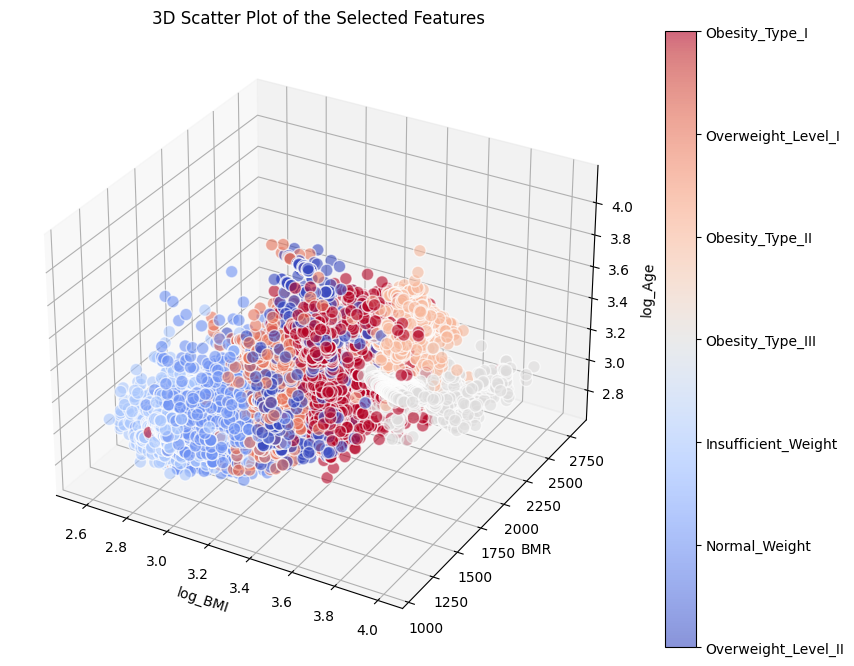

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

obesity_levels = merged_df["NObeyesdad"].unique()
obesity_mapping = {level: idx for idx, level in enumerate(obesity_levels)}
mapped_colors = merged_df["NObeyesdad"].map(obesity_mapping)

sc = ax.scatter(
    merged_df[selected_features[0]],
    merged_df[selected_features[1]],
    merged_df[selected_features[2]],
    c=mapped_colors,
    cmap="coolwarm",
    alpha=0.6,
    edgecolors="w",
    s=80,
)

cbar = fig.colorbar(sc, ticks=list(obesity_mapping.values()))
cbar.ax.set_yticklabels(list(obesity_mapping.keys()))

ax.set_xlabel(selected_features[0])
ax.set_ylabel(selected_features[1])
ax.set_zlabel(selected_features[2])
ax.set_title("3D Scatter Plot of the Selected Features")

plt.show()


The 3D scatter plot visualizes the distribution of the three selected features: 'log_BMI', 'BMR', and 'log_Age'. Each point represents an individual, with its position determined by the values of these three variables. Colored by the different obesity levels, we can observe that certain regions in the plot cluster more towards a particular obesity level, indicating a differentiating pattern.